In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('Rose.csv',parse_dates=['YearMonth'],index_col='YearMonth')
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [3]:
df.dtypes

Rose    float64
dtype: object

In [4]:
df.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


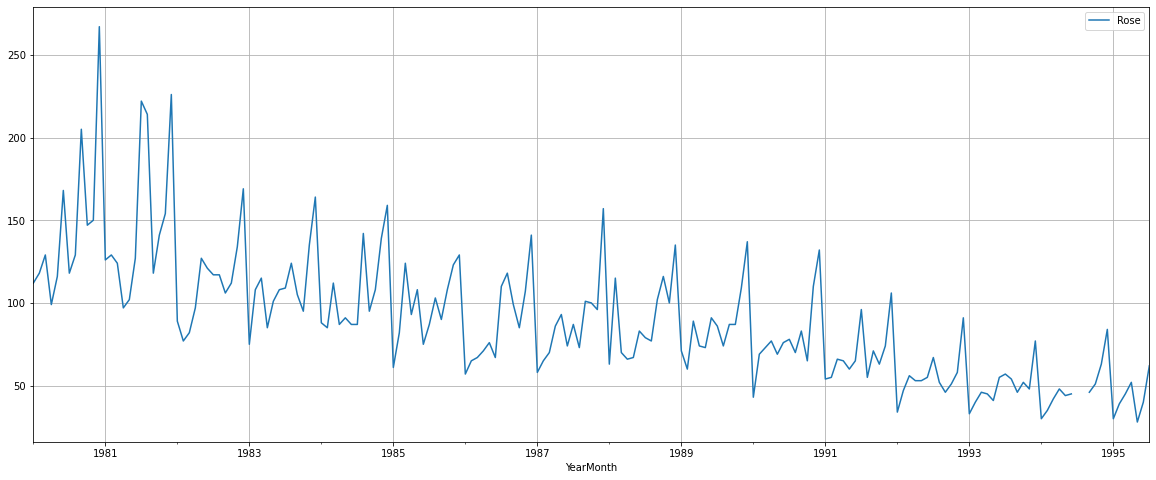

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot();
plt.grid()

In [7]:
df.shape

(187, 1)

In [8]:
df.isnull().sum()

Rose    2
dtype: int64

In [9]:
df[df['Rose'].isnull()==True]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

In [10]:
df['1994-05-01':'1994-10-01'] 

Rose
YearMonth       
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0

In [11]:
df = df.fillna(45)

In [12]:
df['1994-05-01':'1994-10-01'] 

Rose
YearMonth       
1994-05-01  44.0
1994-06-01  45.0
1994-07-01  45.0
1994-08-01  45.0
1994-09-01  46.0
1994-10-01  51.0

In [13]:
df.describe()

Rose
count  187.000000
mean    89.909091
std     39.244440
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

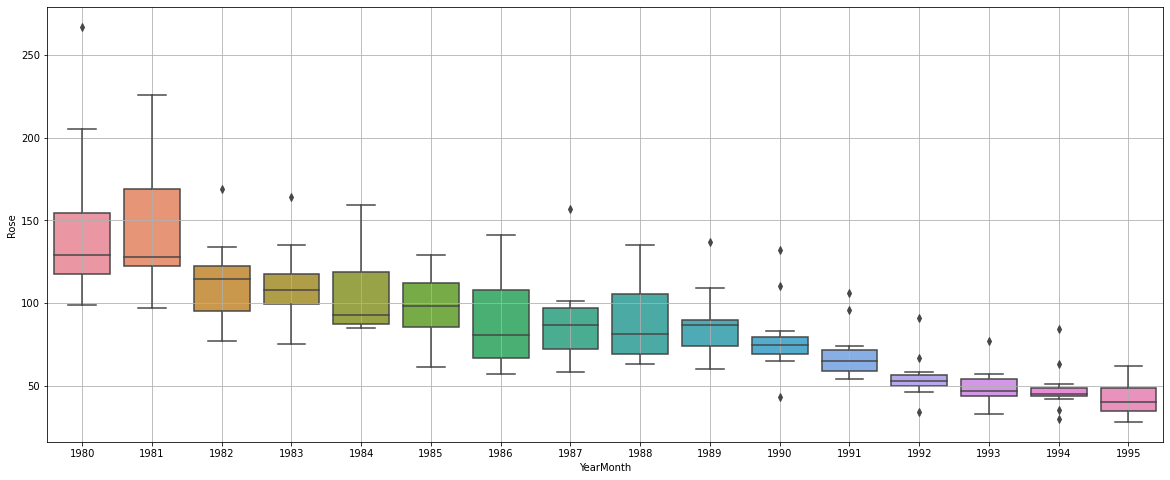

In [14]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

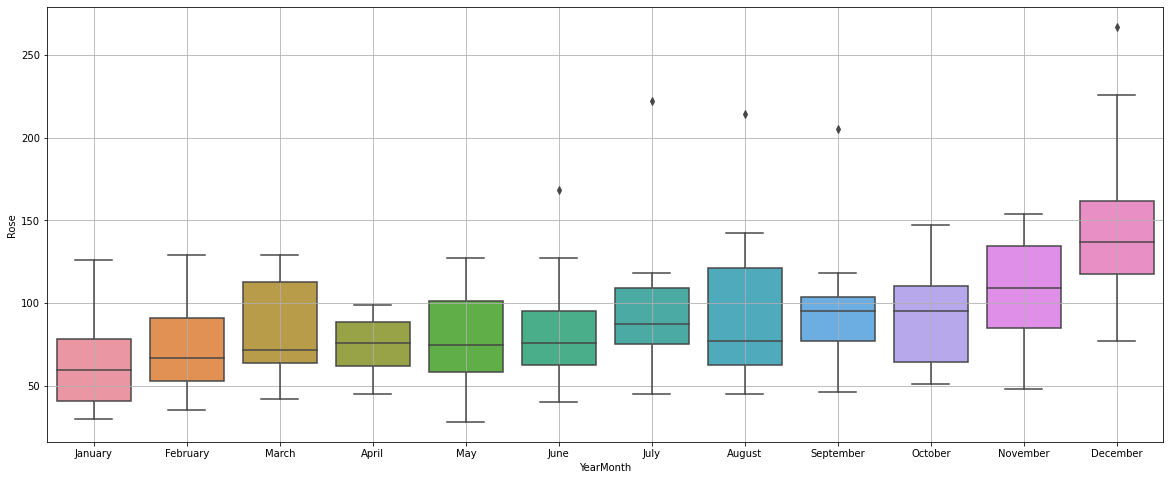

In [15]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

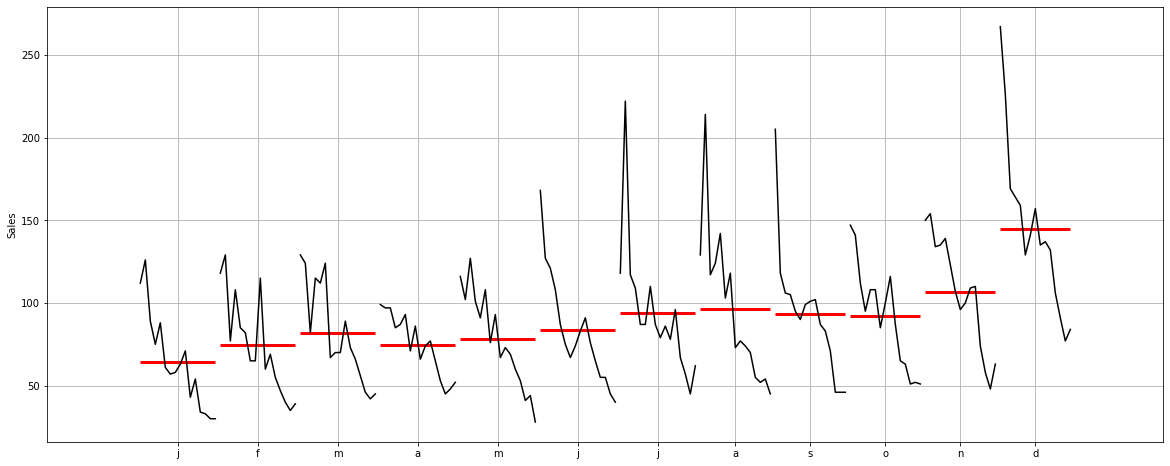

In [16]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Rose'],ylabel='Sales')
plt.grid();

In [17]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6      7      8      9   \
YearMonth                                                                 
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.0   45.0   46.0   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

YearMonth     10     11     12  
YearMonth                       
1980       147.0  150.0  267.0  
1981       141.0  154.0  226.0  
1982       112.0  134.0  169.0  
1983        95.0  135.0  164.0  
1984       108.0  139.0  159.0  
1985       108.0  123.0  129.0  
1986        85.0  107.0  141.0  
1987       100.0   96.0  157.0  
1988       116.0  100.0  135.0  
1989        87.0  109.0  137.0  
1990        65.0  110.0  132.0  
1991        63.0   74.0  106.0  
1992        51.0   58.0   91.0  
1993        52.0   48.0   77.0  
1994        51.0   63.0   84.0  
1995         NaN    NaN    NaN

We can see that there are some missing values in the end of the 1995.when we are forecasting we will forecast for including this 5 missing values. 

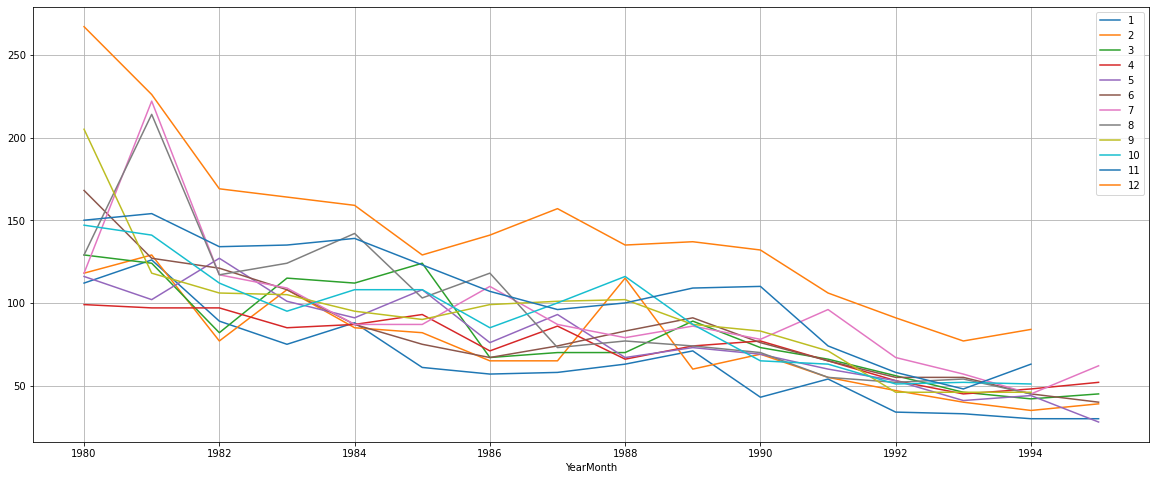

In [18]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Empirical cumulative

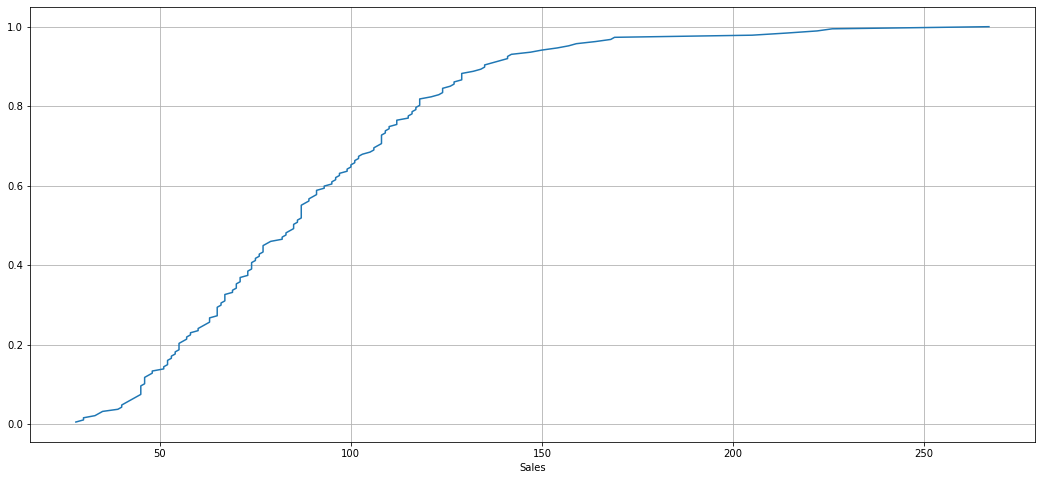

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [20]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

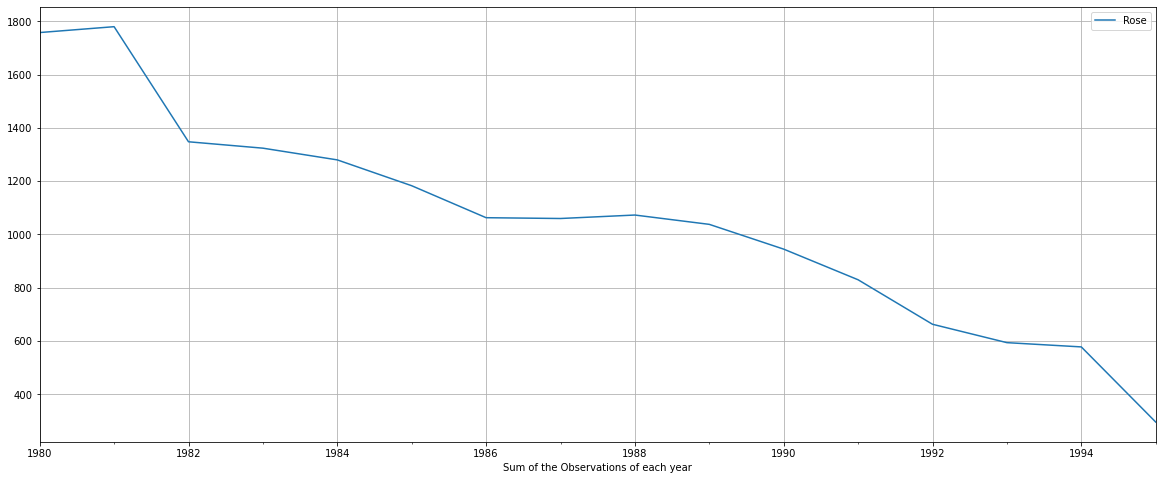

In [21]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [22]:
df_monthly_mean = df.resample('M').mean()
df_monthly_mean.head()

Rose
YearMonth        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

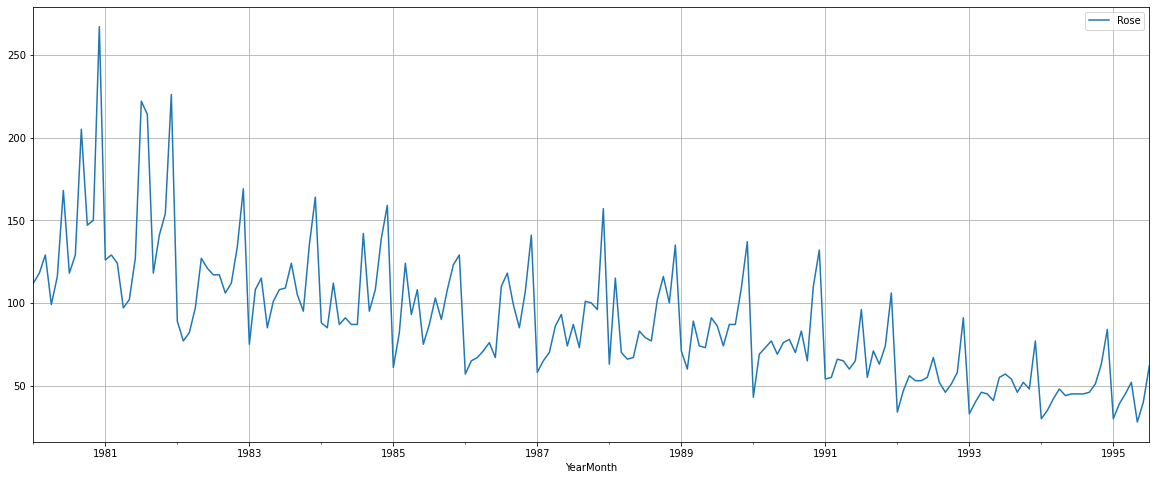

In [23]:
df_monthly_mean.plot();
plt.grid()

In [24]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Rose
YearMonth             
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

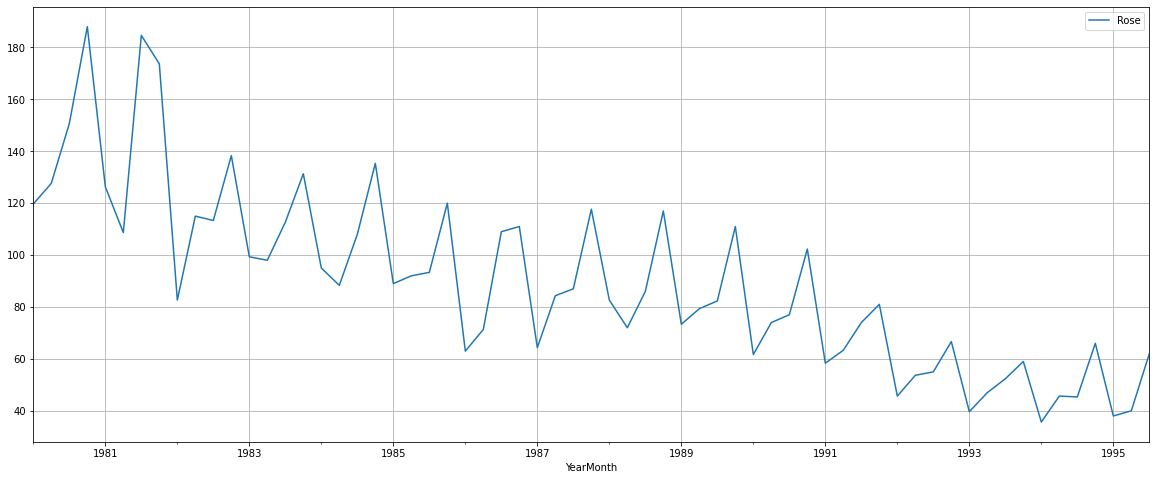

In [25]:
df_quarterly_mean.plot();
plt.grid()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

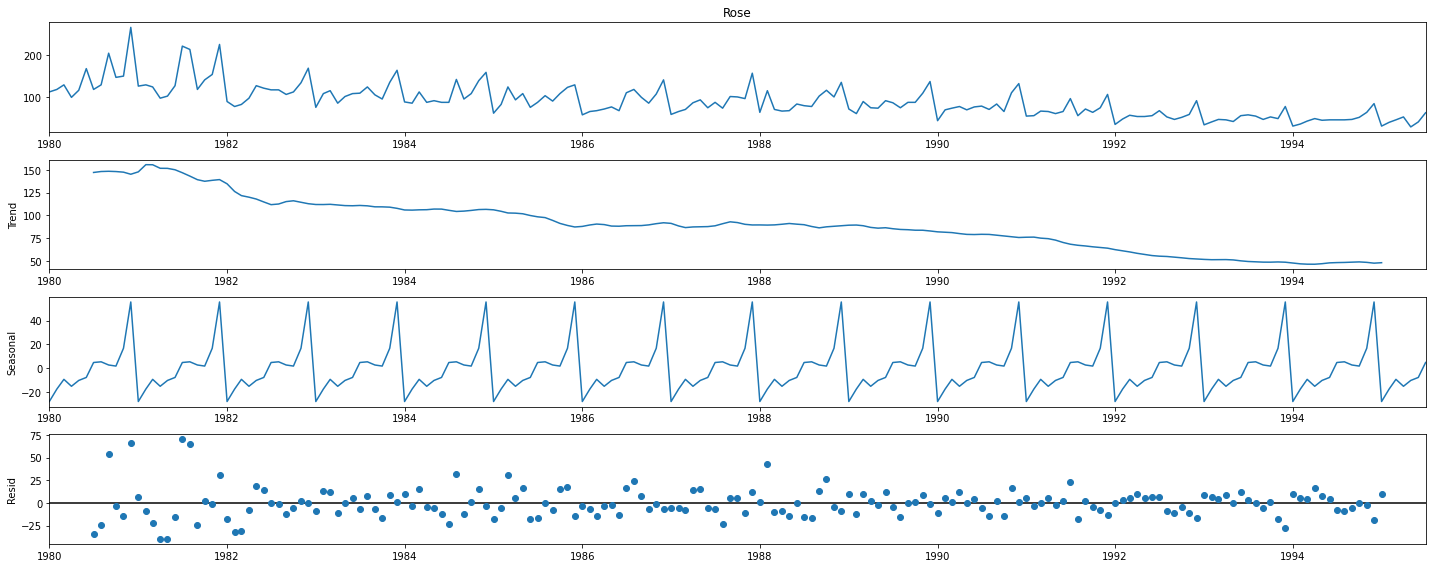

In [27]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [28]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [29]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.903092
1980-02-01   -17.431663
1980-03-01    -9.279878
1980-04-01   -15.092378
1980-05-01   -10.190592
1980-06-01    -7.672735
1980-07-01     4.880241
1980-08-01     5.460797
1980-09-01     2.780241
1980-10-01     1.877464
1980-11-01    16.852464
1980-12-01    55.719130
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.963575
1980-08-01   -24.585797
1980-09-01    53.844759
1980-10-01    -2.960797
1980-11-01   -14.269130
1980-12-01    66.15587

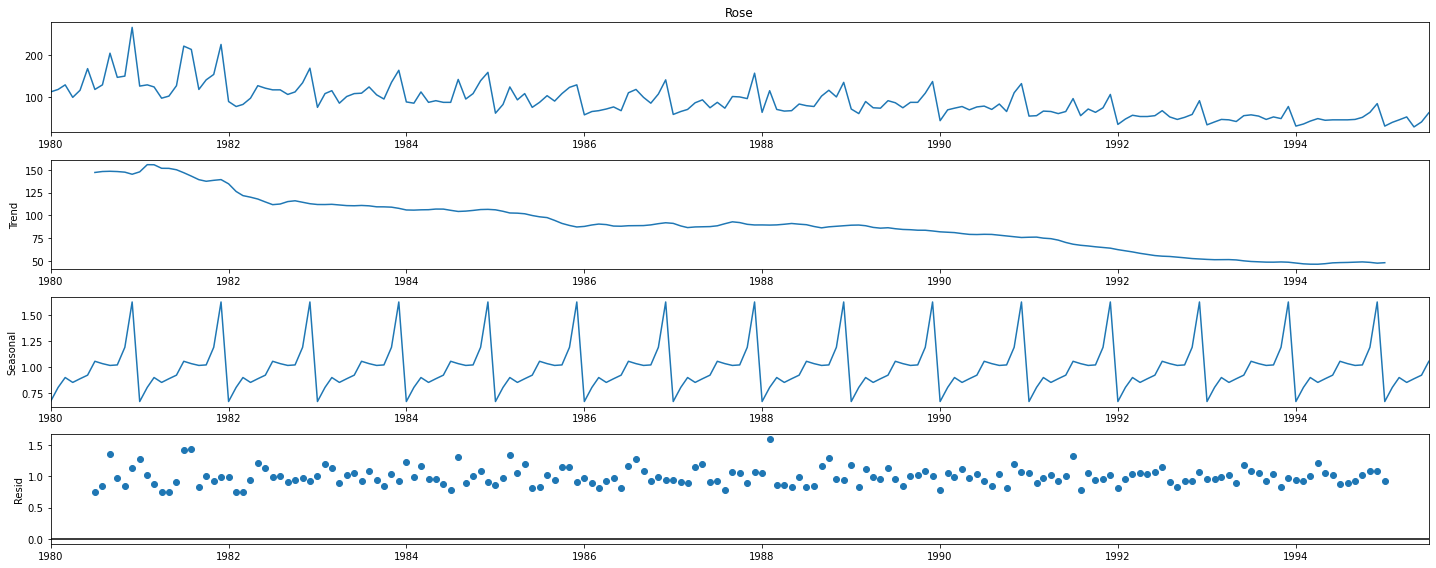

In [30]:
decomposition_mul = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition_mul.plot();

In [31]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

In [32]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670182
1980-02-01    0.806224
1980-03-01    0.901278
1980-04-01    0.854154
1980-05-01    0.889531
1980-06-01    0.924099
1980-07-01    1.057682
1980-08-01    1.035066
1980-09-01    1.017753
1980-10-01    1.022688
1980-11-01    1.192494
1980-12-01    1.628848
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758514
1980-08-01    0.841382
1980-09-01    1.357534
1980-10-01    0.970661
1980-11-01    0.853274
1980-12-01    1.129506
Name: resid, dtype: fl

In [33]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [34]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data') 
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

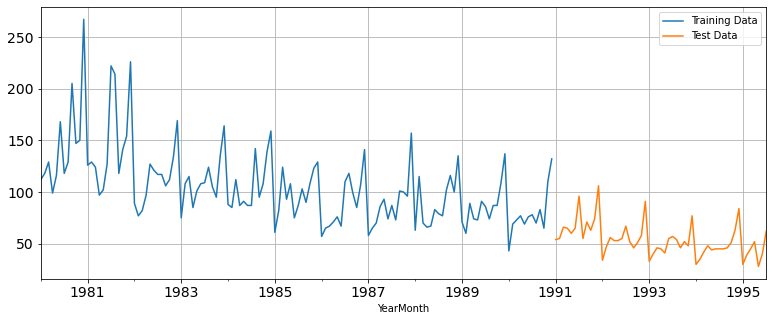

In [35]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [36]:
print('Shape of training data is',train.shape)
print('Shape of testing data',test.shape)

Shape of training data is (132, 1)
Shape of testing data (55, 1)


## Linear Regression

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [38]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [39]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values) 

LinearRegression()

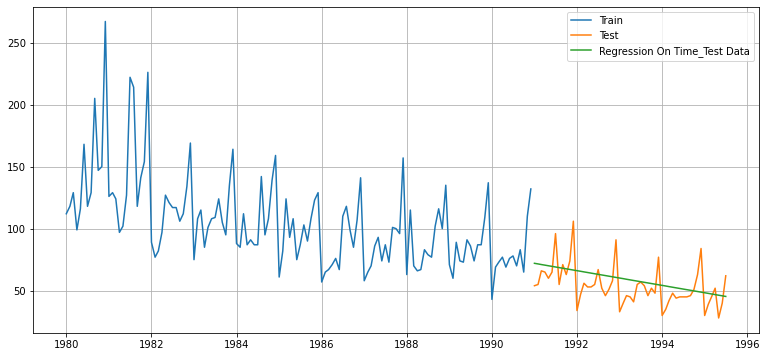

In [41]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [42]:
from sklearn import metrics

In [43]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.276


In [44]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  15.275732

### NAIVE

In [45]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [46]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

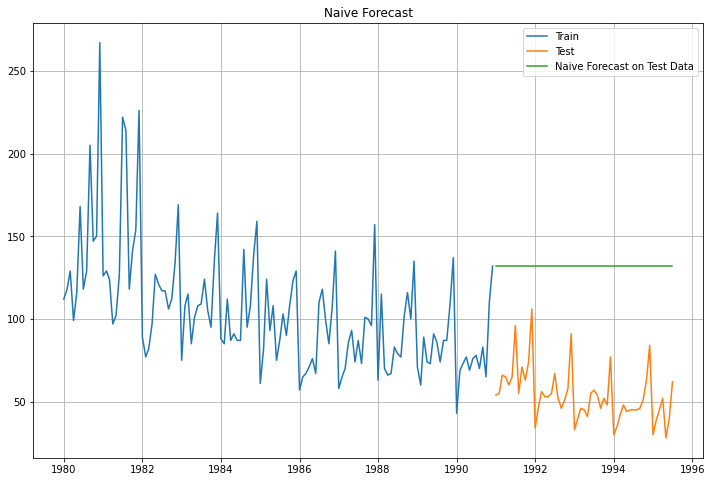

In [47]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [48]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.739


In [49]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  15.275732
NaiveModel        79.738550

## Simple Average

In [50]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [51]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

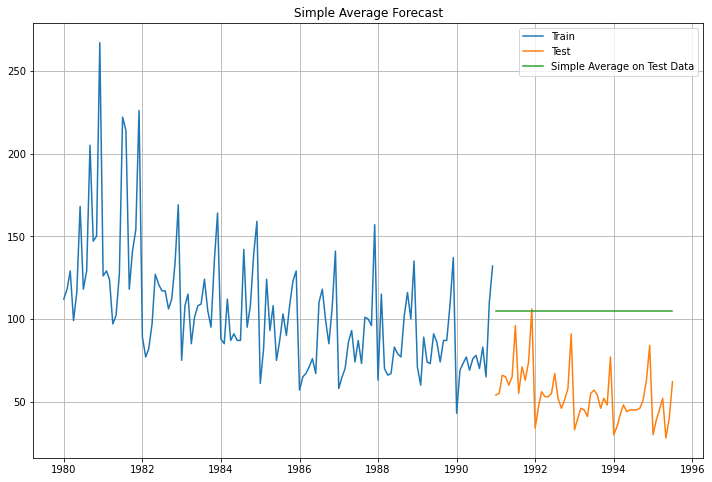

In [52]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [53]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.481


In [54]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    15.275732
NaiveModel          79.738550
SimpleAverageModel  53.480857

### Moving Average

In [55]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [56]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

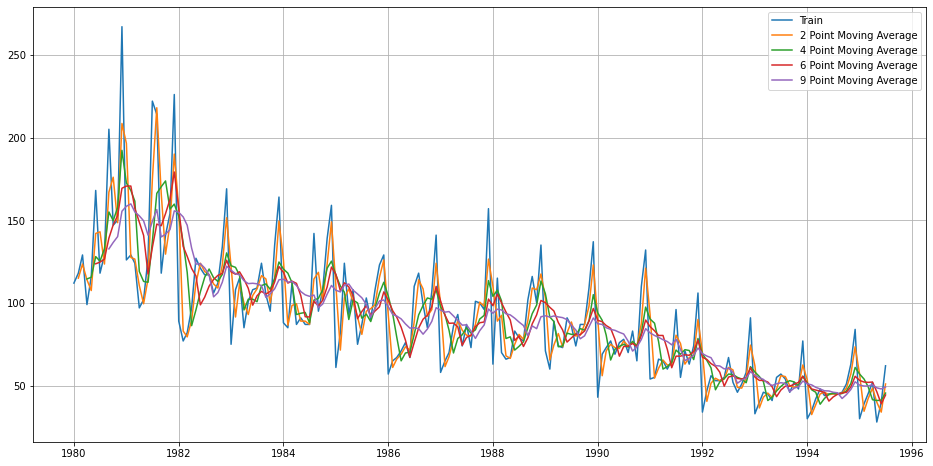

In [57]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [58]:
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]

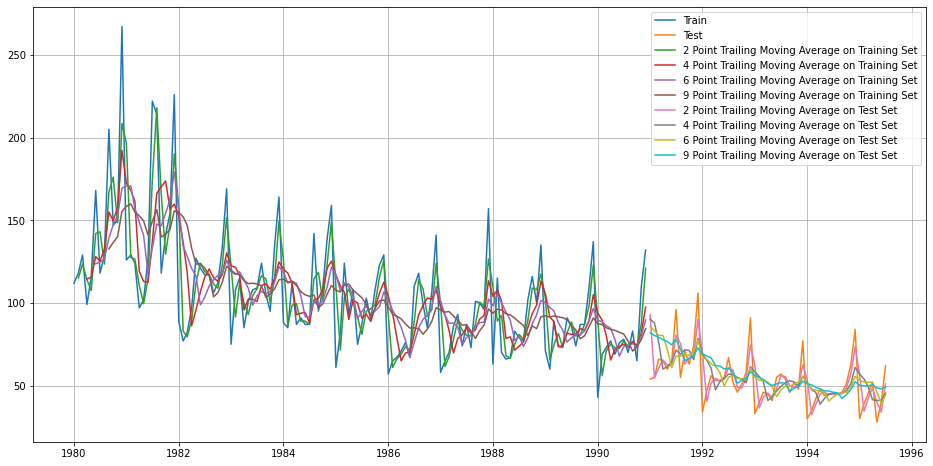

In [59]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [60]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.455
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.731 


In [61]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             15.275732
NaiveModel                   79.738550
SimpleAverageModel           53.480857
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.455221
6pointTrailingMovingAverage  14.572009
9pointTrailingMovingAverage  14.731209

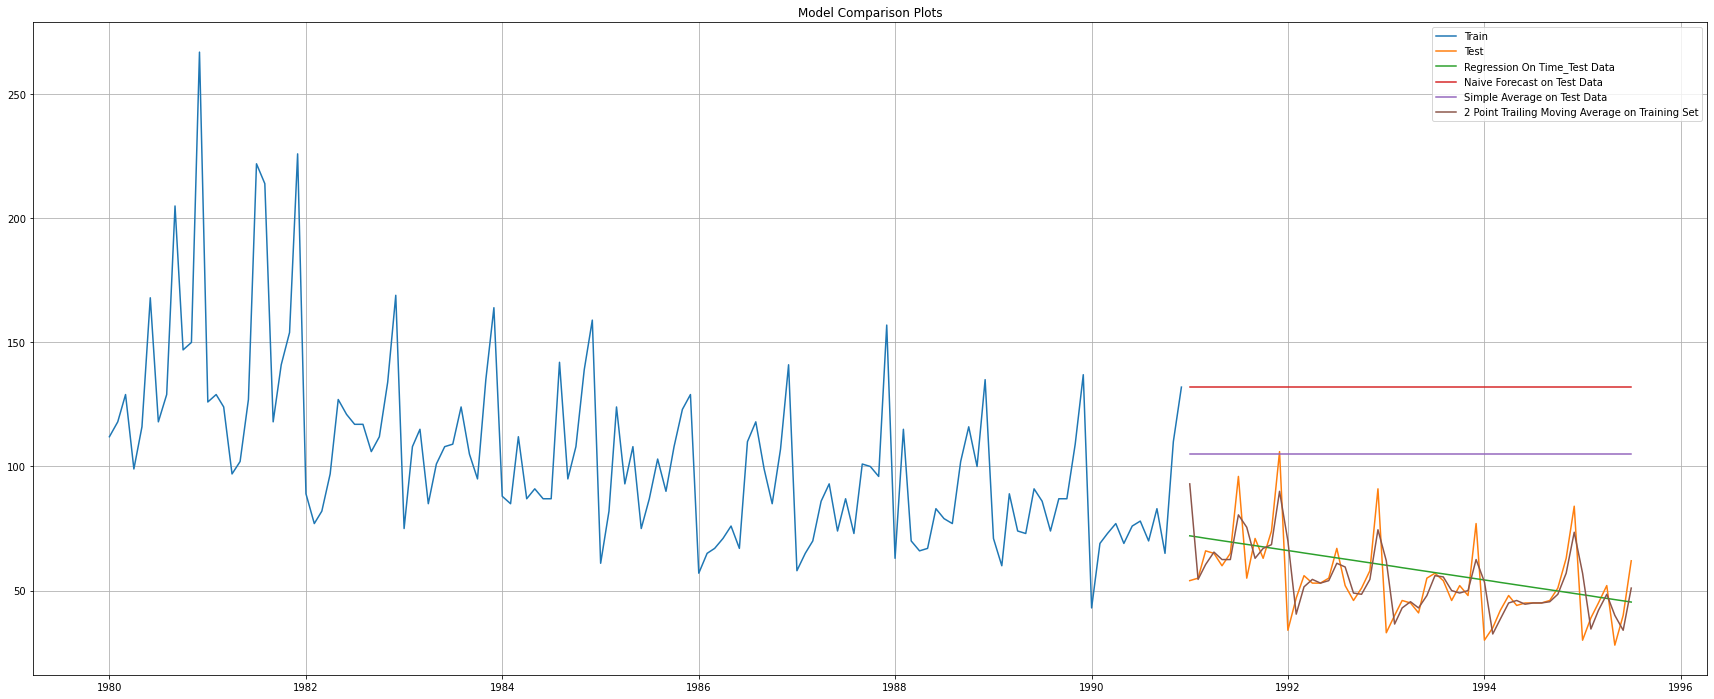

In [62]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Exponential smoothing

In [63]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings('ignore')

In [64]:
SES_train = train.copy()
SES_test = test.copy()

In [65]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [66]:
model_SES_autofit = model_SES.fit(optimized=True)

In [67]:
model_SES_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104999
1991-02-01  55.0  87.104999
1991-03-01  66.0  87.104999
1991-04-01  65.0  87.104999
1991-05-01  60.0  87.104999

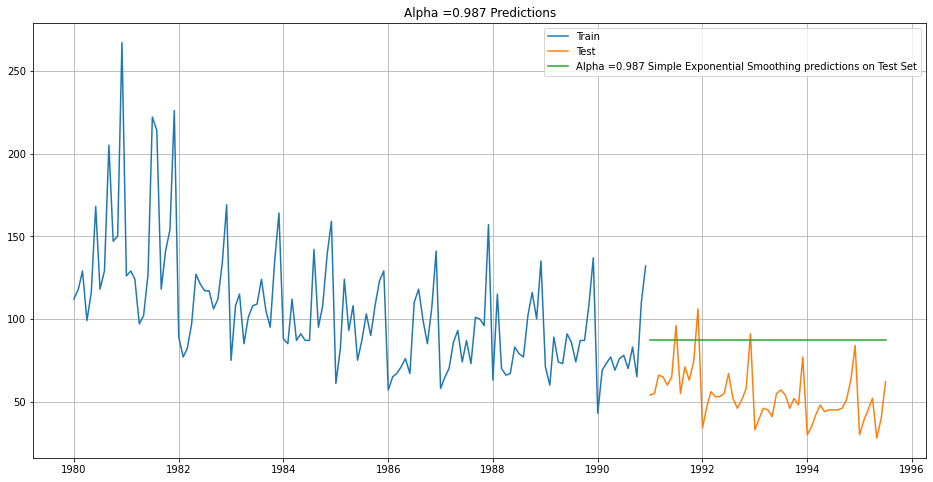

In [69]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.987 Predictions');

In [70]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


In [71]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             11.529409
4pointTrailingMovingAverage             14.455221
6pointTrailingMovingAverage             14.572009
9pointTrailingMovingAverage             14.731209
Alpha=0.987,SimpleExponentialSmoothing  36.816904

In [72]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [73]:
for i in np.arange(0.2,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [74]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.20   31.979391  41.382452
1           0.21   32.022650  41.961982
2           0.22   32.067824  42.553373
3           0.23   32.114584  43.154797
4           0.24   32.162669  43.764603
..           ...         ...        ...
75          0.95   38.112735  78.552491
76          0.96   38.243543  78.806675
77          0.97   38.376021  79.052473
78          0.98   38.510198  79.289787
79          0.99   38.646108  79.518514

[80 rows x 3 columns]

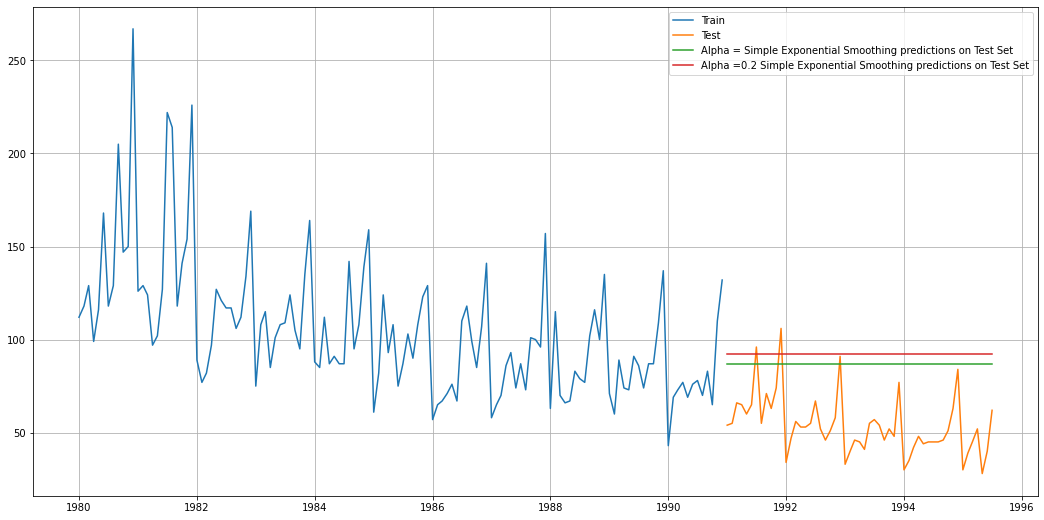

In [75]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [76]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             11.529409
4pointTrailingMovingAverage             14.455221
6pointTrailingMovingAverage             14.572009
9pointTrailingMovingAverage             14.731209
Alpha=0.987,SimpleExponentialSmoothing  36.816904
Alpha=0.2,SimpleExponentialSmoothing    41.382452

## Duble exponential

In [77]:
DES_train = train.copy()
DES_test = test.copy()

In [78]:
model_DES = Holt(DES_train['Rose'])

In [79]:
model_DES_autofit = model_DES.fit(optimized=True)

In [80]:
model_DES_autofit.params

{'smoothing_level': 1.4903109413942238e-08,
 'smoothing_trend': 3.0715523798138926e-18,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81555273182406,
 'initial_trend': -0.49437822071047205,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  72.063249
1991-02-01  55.0  71.568871
1991-03-01  66.0  71.074493
1991-04-01  65.0  70.580115
1991-05-01  60.0  70.085736

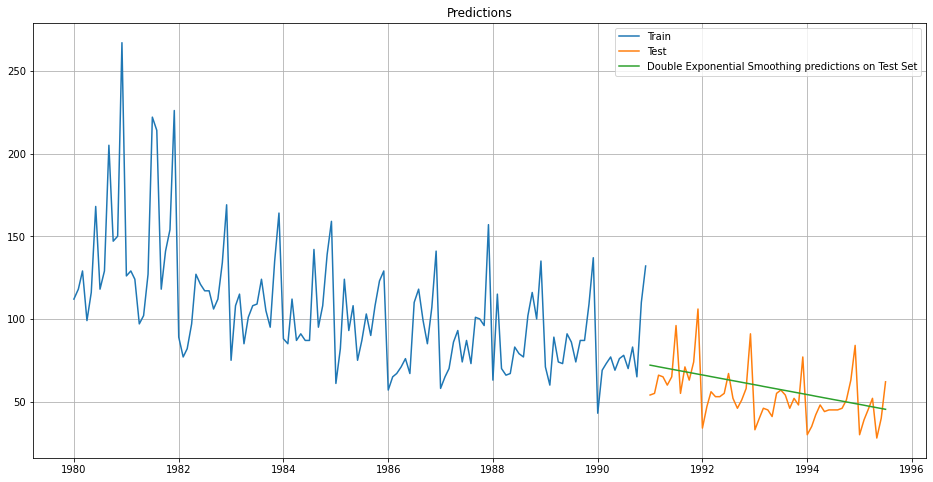

In [82]:
plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions');

In [83]:
rmse_model5_test_DES = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =0.995 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_DES))

For Alpha =0.995 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.276


In [84]:
resultsDf_DES = pd.DataFrame({'Test RMSE': [rmse_model5_test_DES]},index=['DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_DES])
resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             11.529409
4pointTrailingMovingAverage             14.455221
6pointTrailingMovingAverage             14.572009
9pointTrailingMovingAverage             14.731209
Alpha=0.987,SimpleExponentialSmoothing  36.816904
Alpha=0.2,SimpleExponentialSmoothing    41.382452
DoubleExponentialSmoothing              15.275724

In [85]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [86]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [87]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.944983  265.591922
1            0.3          0.4   37.393239  358.775361
2            0.3          0.5   38.888325  451.834692
3            0.3          0.6   40.280670  536.978631
4            0.3          0.7   41.403518  601.640840
..           ...          ...         ...         ...
59           1.0          0.6   51.831610  801.704637
60           1.0          0.7   54.497039  841.917005
61           1.0          0.8   57.365879  853.989973
62           1.0          0.9   60.474309  834.735365
63           1.0          1.0   63.873454  780.103991

[64 rows x 4 columns]

In [88]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.944983  265.591922
8            0.4          0.3   36.749123  339.330850
1            0.3          0.4   37.393239  358.775361
16           0.5          0.3   37.433314  394.296935
24           0.6          0.3   38.348984  439.320331

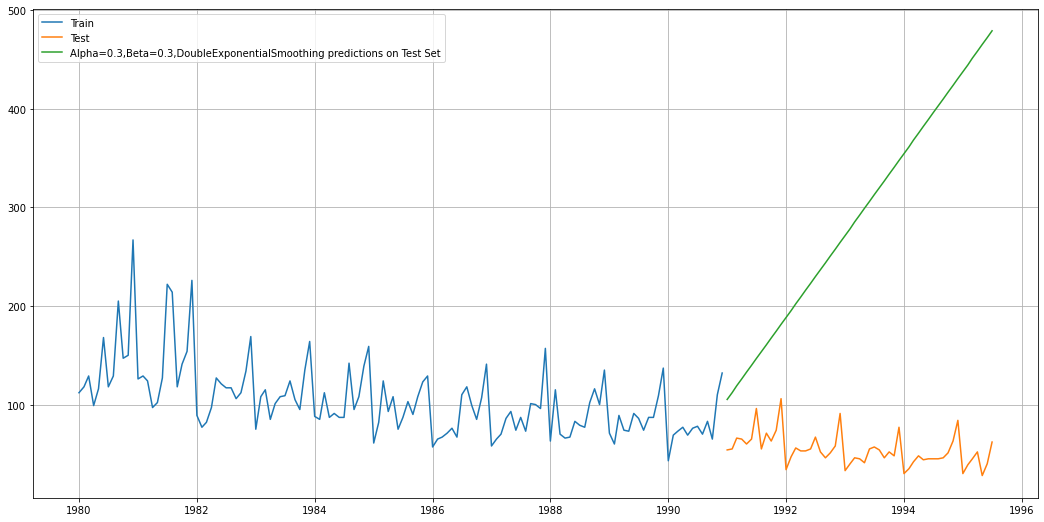

In [89]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [90]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                15.275732
NaiveModel                                      79.738550
SimpleAverageModel                              53.480857
2pointTrailingMovingAverage                     11.529409
4pointTrailingMovingAverage                     14.455221
6pointTrailingMovingAverage                     14.572009
9pointTrailingMovingAverage                     14.731209
Alpha=0.987,SimpleExponentialSmoothing          36.816904
Alpha=0.2,SimpleExponentialSmoothing            41.382452
DoubleExponentialSmoothing                      15.275724
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  265.591922

### Triple Exponential

In [91]:
TES_train = train.copy()
TES_test = test.copy()

In [92]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

In [93]:
model_TES_autofit = model_TES.fit()

In [94]:
model_TES_autofit.params

{'smoothing_level': 0.0639185344378022,
 'smoothing_trend': 0.05410919449323092,
 'smoothing_seasonal': 1.4964739107568277e-07,
 'damping_trend': nan,
 'initial_level': 52.28901381819336,
 'initial_trend': -0.32694217703162254,
 'initial_seasons': array([2.15698437, 2.4476911 , 2.67417969, 2.33738212, 2.62760267,
        2.86527654, 3.14973284, 3.34890224, 3.17815524, 3.10941764,
        3.62424833, 4.99888089]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     56.803529
1991-02-01  55.0     64.268249
1991-03-01  66.0     70.006458
1991-04-01  65.0     61.007197
1991-05-01  60.0     68.377143

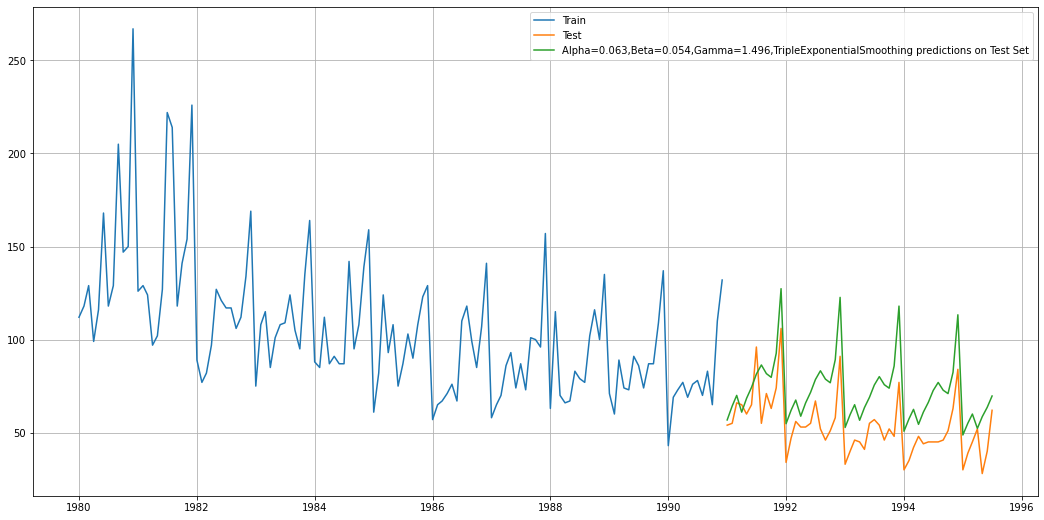

In [96]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.063,Beta=0.054,Gamma=1.496,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [97]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.063,Beta=0.054,Gamma=1.496, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1)) 

For Alpha=0.063,Beta=0.054,Gamma=1.496, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.276


In [98]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                     15.275732
NaiveModel                                           79.738550
SimpleAverageModel                                   53.480857
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
DoubleExponentialSmoothing                           15.275724
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162

In [99]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [100]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [101]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.3          0.3           0.3     27.217969     19.074245
1             0.3          0.3           0.4     27.399095     11.185630
2             0.3          0.3           0.5     27.928512     30.542692
3             0.3          0.3           0.6     28.888611     63.601214
4             0.3          0.3           0.7     30.568635    122.452533
..            ...          ...           ...           ...           ...
507           1.0          1.0           0.6  28358.458519   9603.639171
508           1.0          1.0           0.7  30724.126331  23029.955433
509           1.0          1.0           0.8   1218.755446   9626.707516
510           1.0          1.0           0.9  14150.253251   9691.904819
511           1.0          1.0           1.0   1768.254189   8138.615771

[512 rows x 5 columns]

In [102]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
8             0.3          0.4           0.3   28.111886  10.951007
1             0.3          0.3           0.4   27.399095  11.185630
69            0.4          0.3           0.8   32.601491  12.613096
16            0.3          0.5           0.3   29.087520  14.395909
131           0.5          0.3           0.6   32.144773  16.703934

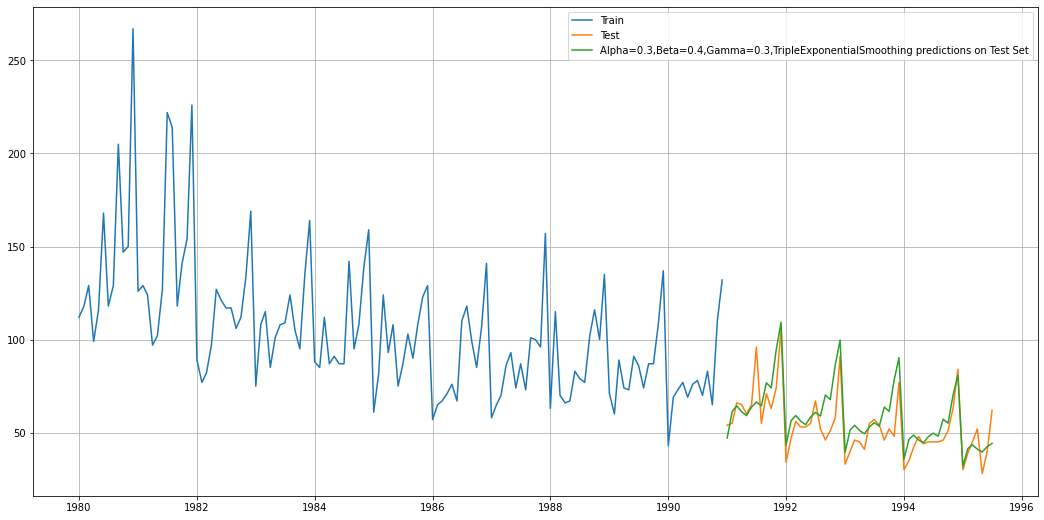

In [103]:

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [104]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                     15.275732
NaiveModel                                           79.738550
SimpleAverageModel                                   53.480857
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
DoubleExponentialSmoothing                           15.275724
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007

In [105]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
DoubleExponentialSmoothing                           15.275724
RegressionOnTime                                     15.275732
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
SimpleAverageModel                                   53.480857
NaiveModel                                           79.738550
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922

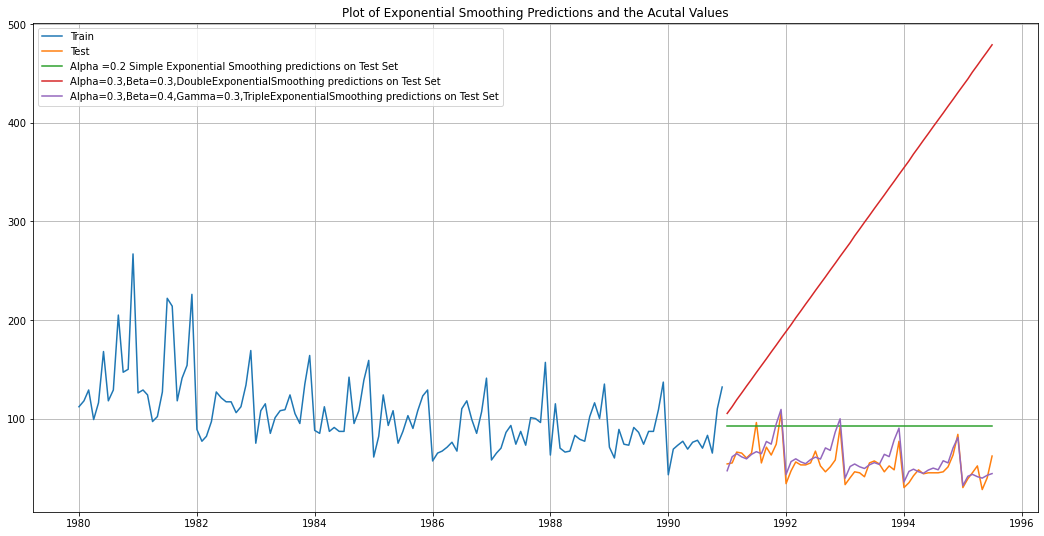

In [106]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## ALL THE MODELS PLOT

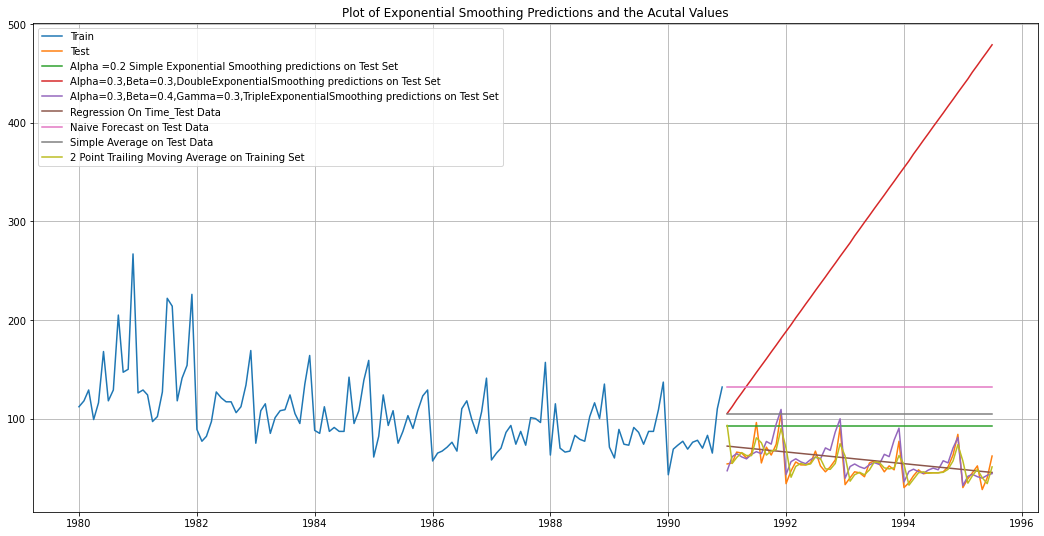

In [107]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

### Stationarity 

In [108]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(window=7).mean() 
    rolstd = timeseries.rolling(window=7).std()  

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

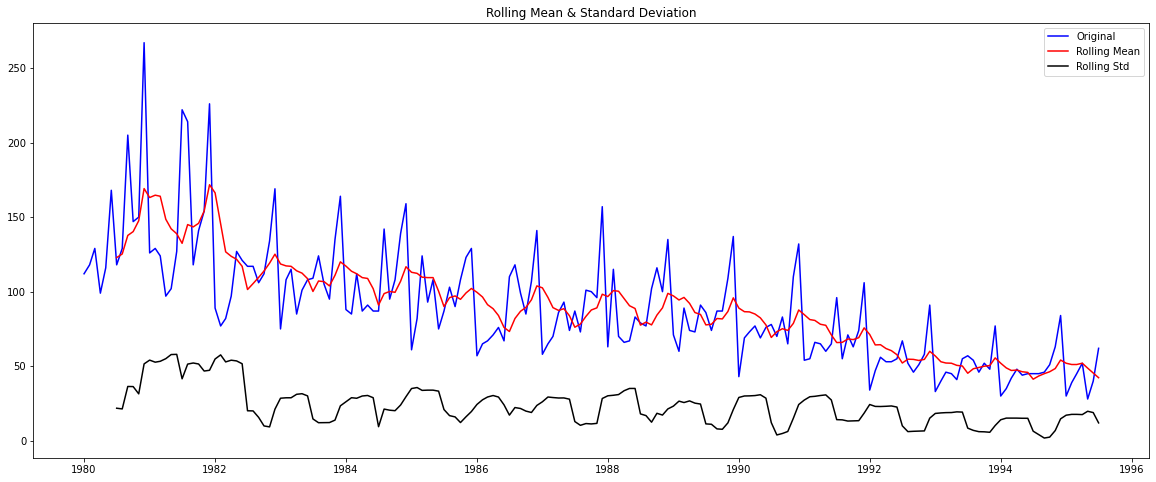

Results of Dickey-Fuller Test:
Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [109]:
test_stationarity(df['Rose'])

The P value is more than our significance of 0.05. The P value is 0.34 therefore we cannot reject the null. 

## Hypthesis
Null: The series is non stationery.


Alternate: The series is stationery. 


H0: It is non stationery


H1: It is stationery

    

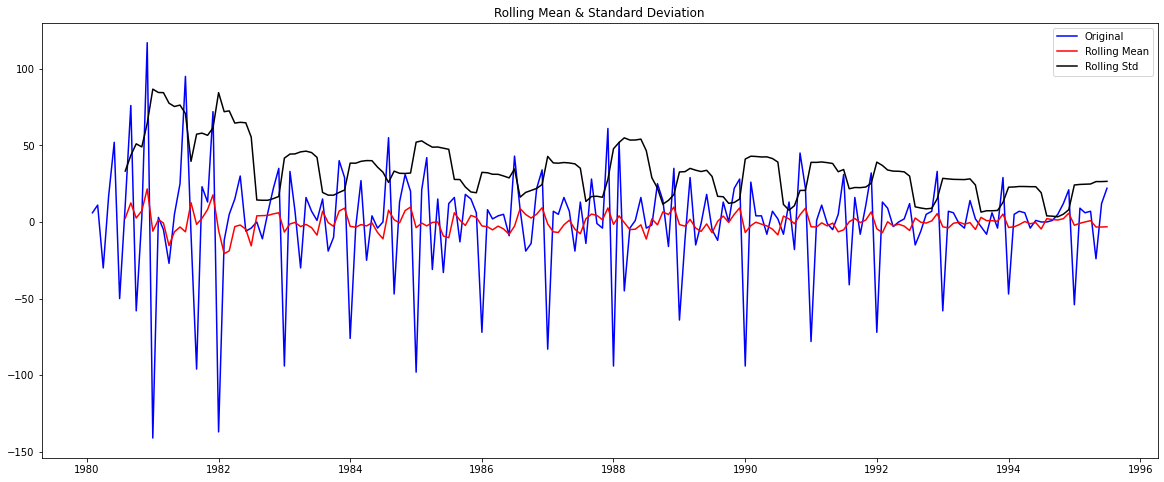

Results of Dickey-Fuller Test:
Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [110]:
test_stationarity(df['Rose'].diff().dropna())

### PACF AND ACF

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

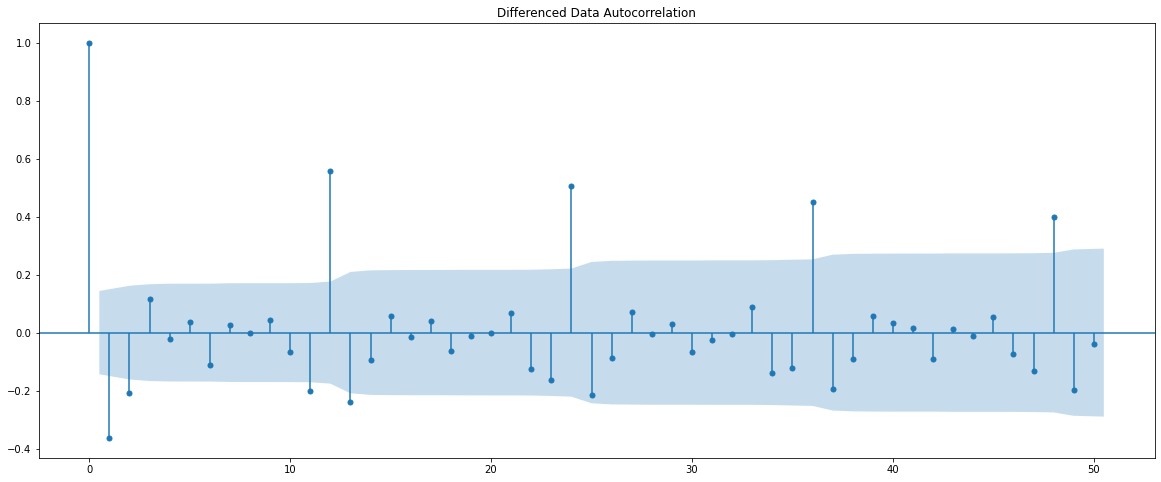

In [112]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

Q is 2 

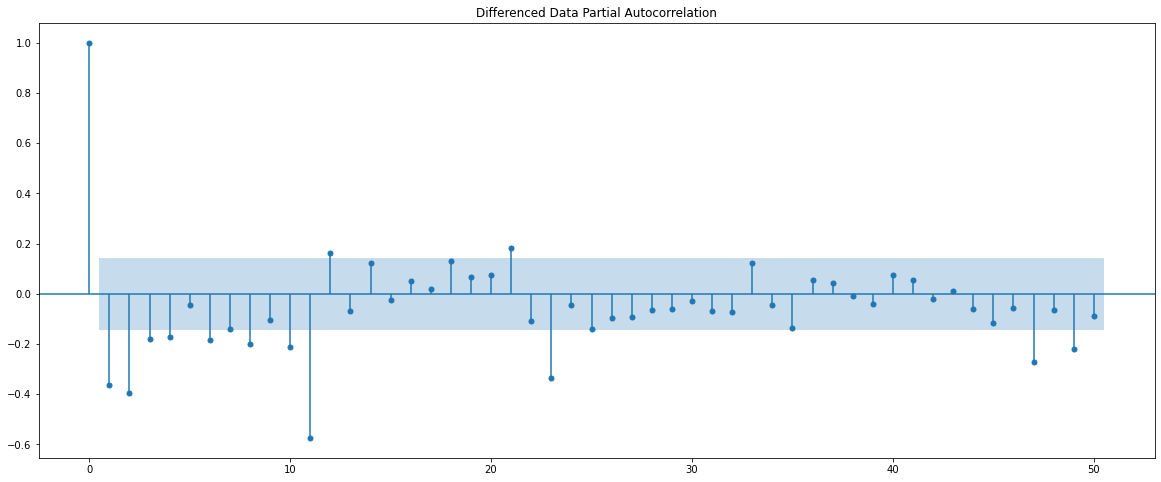

In [113]:
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

P is 5

## Check Stationarity for the training data 

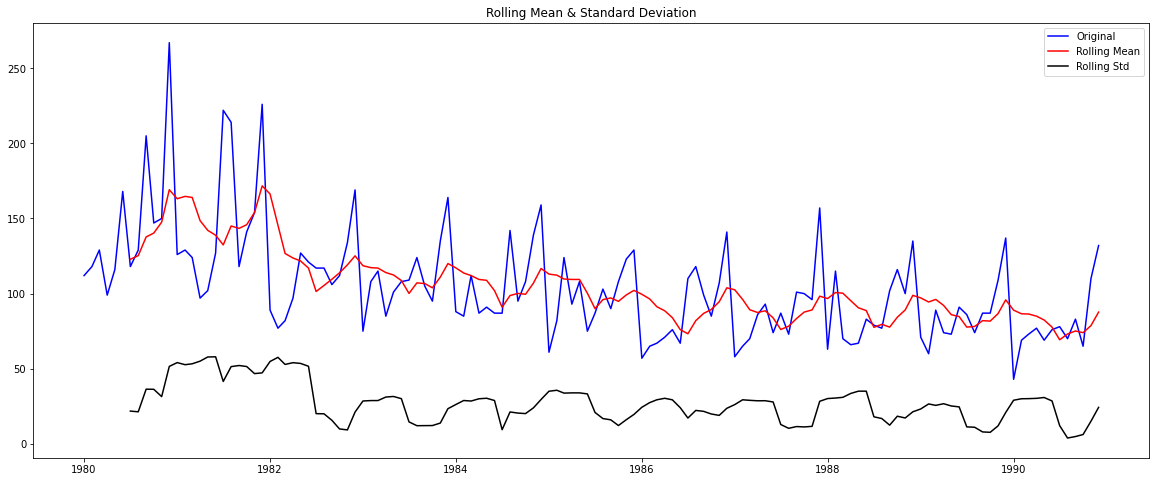

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [114]:
test_stationarity(train['Rose'])

P value is more than 0.05 so we cannot reject the null nythosis of the series is non stationary.we have to take a difference of 1.

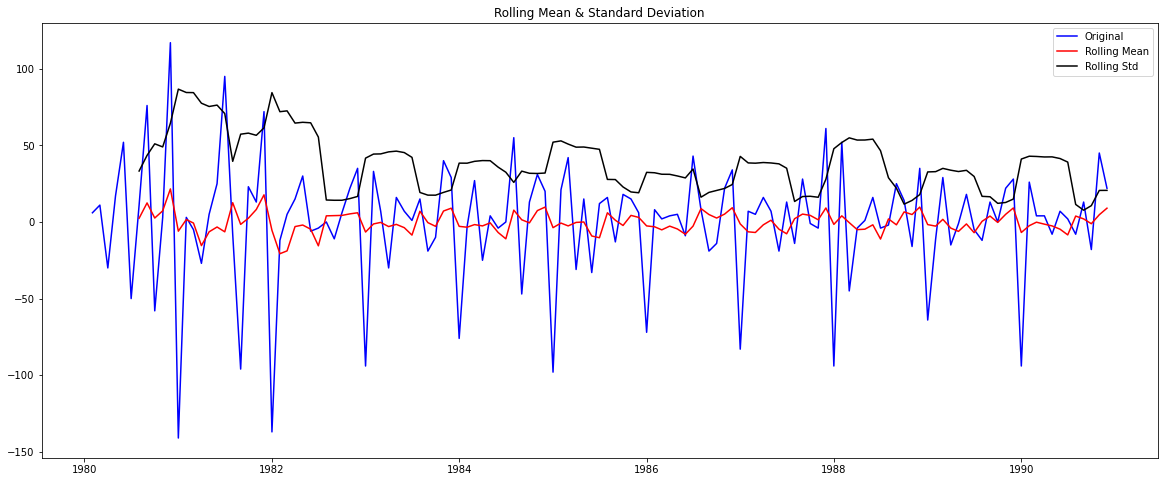

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [115]:
test_stationarity(train['Rose'].diff().dropna())

## ARIMA

In [116]:
from statsmodels.tsa.arima_model import ARIMA

In [117]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [118]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [119]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.835373244825
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.775748930104
ARIMA(1, 1, 2) - AIC:1277.3592282649006
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.0456894093109
ARIMA(2, 1, 2) - AIC:1279.2986939365226


In [120]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359228
4  (1, 1, 1)  1277.775749
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [121]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Mon, 25 Jan 2021   AIC                           1276.835
Time:                        13:00:49   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

## Predict on test

In [122]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [123]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.624985975853807


In [124]:
resultsARIMA = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsARIMA])
resultsDf

Test RMSE
RegressionOnTime                                     15.275732
NaiveModel                                           79.738550
SimpleAverageModel                                   53.480857
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
DoubleExponentialSmoothing                           15.275724
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
ARIMA(0,1,2)                                         15.624986

In [125]:
final_avg =test.copy()
pred_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
pred_ARIMA[0]

array([83.95252288, 71.47888585, 70.9903452 , 70.50180455, 70.0132639 ,
       69.52472325, 69.0361826 , 68.54764195, 68.05910129, 67.57056064,
       67.08201999, 66.59347934, 66.10493869, 65.61639804, 65.12785739,
       64.63931674, 64.15077609, 63.66223544, 63.17369478, 62.68515413,
       62.19661348, 61.70807283, 61.21953218, 60.73099153, 60.24245088,
       59.75391023, 59.26536958, 58.77682892, 58.28828827, 57.79974762,
       57.31120697, 56.82266632, 56.33412567, 55.84558502, 55.35704437,
       54.86850372, 54.37996306, 53.89142241, 53.40288176, 52.91434111,
       52.42580046, 51.93725981, 51.44871916, 50.96017851, 50.47163786,
       49.98309721, 49.49455655, 49.0060159 , 48.51747525, 48.0289346 ,
       47.54039395, 47.0518533 , 46.56331265, 46.074772  , 45.58623135])

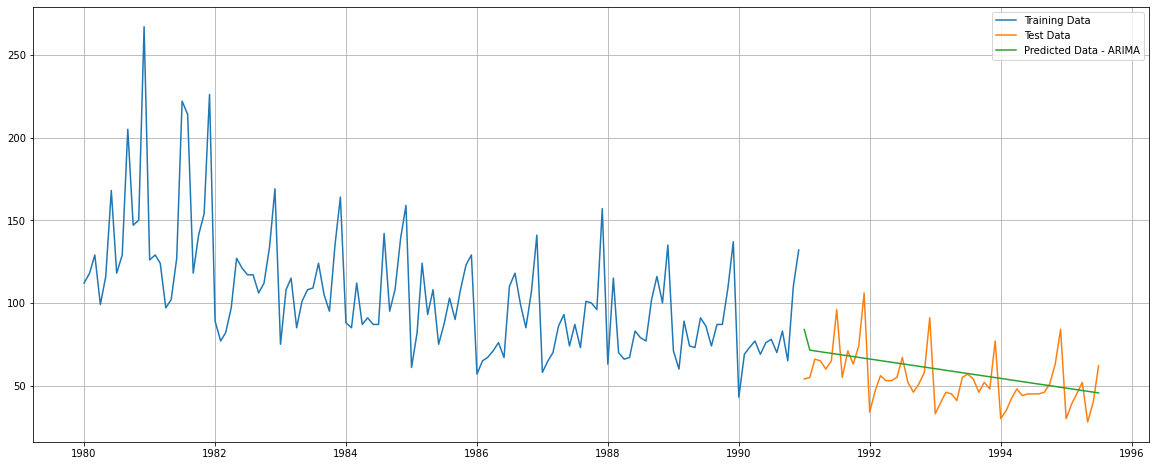

In [126]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

### SARIMA

Looking ACF plot for checking the sesonality and we can say that we can see a seasonality at 12 lag in the below graph.

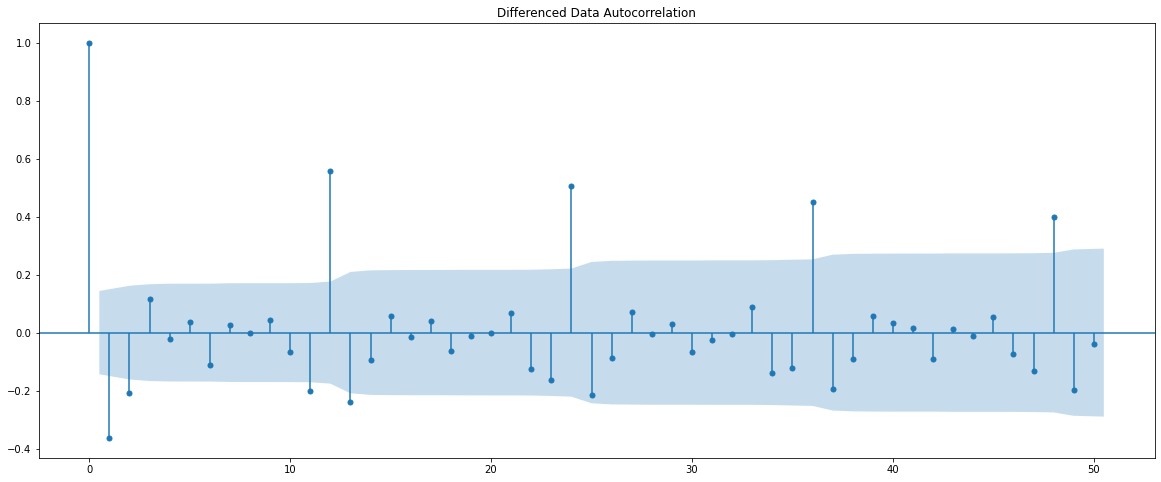

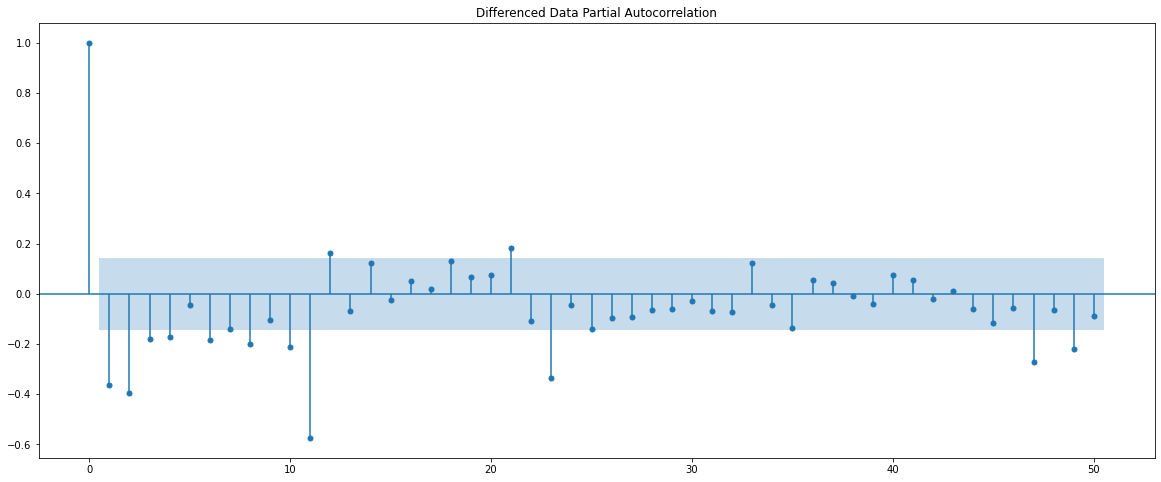

In [127]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [128]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [129]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [130]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301639836
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776045
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601614
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654592
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.513269837442
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729145957
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244218396
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133563728
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717561
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809265067
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655531171
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520094
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670290844
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350158659
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555752634607
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.153871512565
SARIMA(0, 1, 2)x(0, 1, 0, 12

In [131]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 1, 2, 12)  774.969120
53  (1, 1, 2)  (2, 1, 2, 12)  776.940112
80  (2, 1, 2)  (2, 1, 2, 12)  776.996101
17  (0, 1, 1)  (2, 1, 2, 12)  782.153872
79  (2, 1, 2)  (2, 1, 1, 12)  783.703652

In [132]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Mon, 25 Jan 2021   AIC                            774.969
Time:                                    13:01:55   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.167      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

In [133]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [134]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.213931  14.221624      16.340059      72.087803
1  62.327123  14.300416      34.298823      90.355424
2  67.313329  14.302324      39.281288      95.345369
3  63.161121  14.305232      35.123382      91.198861
4  66.474140  14.310608      38.425864      94.522416

In [135]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

16.51918408618999


In [136]:
final_avg =test.copy()
pred_SARIMA = results_auto_SARIMA_12.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

array([ 44.21393105,  62.32712339,  67.31332876,  63.16112118,
        66.47413982,  66.38333765,  73.46375389,  75.27154459,
        76.45697722,  74.17866042,  96.96791916, 127.45567941,
        42.08830894,  56.79038236,  63.60343248,  57.30234637,
        62.49786112,  62.03951663,  69.42771935,  72.28432539,
        71.83483569,  72.55396984,  91.31821827, 123.24228982,
        37.71715142,  52.57975547,  59.43909822,  53.37635766,
        58.18839493,  58.00935764,  65.1995736 ,  67.69576219,
        67.66262271,  67.86712308,  87.36846896, 119.00597869,
        33.3719922 ,  48.3851347 ,  55.17019734,  49.20886947,
        53.92369036,  53.77343574,  60.94127034,  63.37625883,
        63.43154461,  63.4858511 ,  83.19108651, 114.75471072,
        29.12211196,  44.13574995,  50.91531261,  44.94886631,
        49.67508428,  49.5145136 ,  56.68956586])

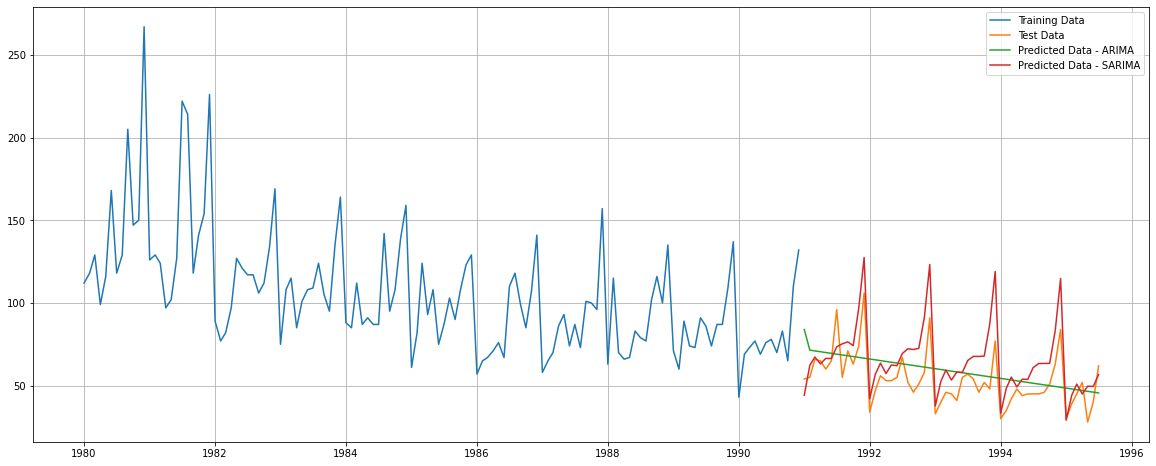

In [137]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [138]:
resultsSARIMA = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA12(0,1,2)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,resultsSARIMA])

resultsDf

Test RMSE
RegressionOnTime                                     15.275732
NaiveModel                                           79.738550
SimpleAverageModel                                   53.480857
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
DoubleExponentialSmoothing                           15.275724
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
ARIMA(0,1,2)                                         15.624986
SARIMA12(0,1,2)(2,1,2,12)                            16.519184

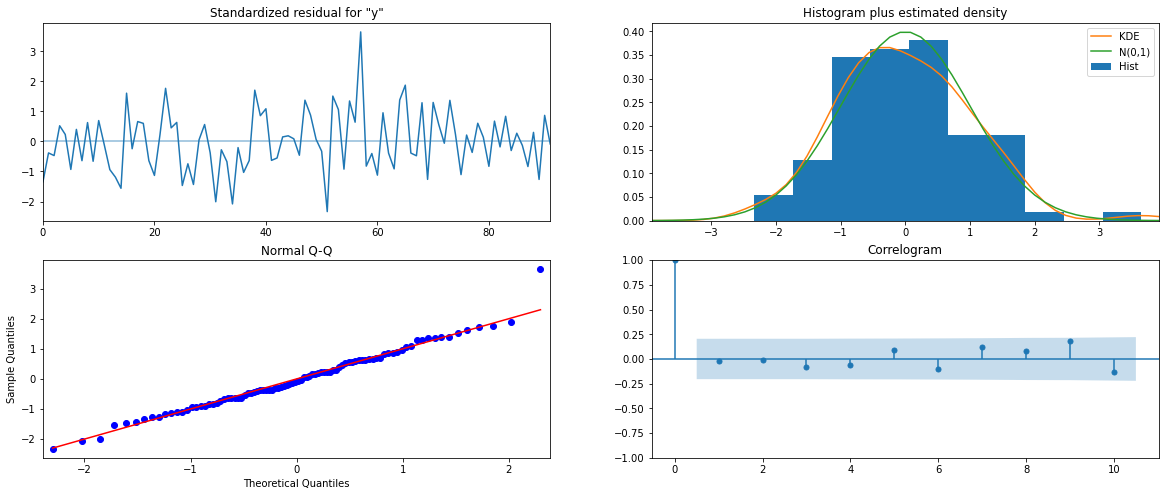

In [139]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## SARIMA WITH 24 MONTHS

In [140]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 24)
Model: (0, 1, 2)(0, 0, 2, 24)
Model: (1, 1, 0)(1, 0, 0, 24)
Model: (1, 1, 1)(1, 0, 1, 24)
Model: (1, 1, 2)(1, 0, 2, 24)
Model: (2, 1, 0)(2, 0, 0, 24)
Model: (2, 1, 1)(2, 0, 1, 24)
Model: (2, 1, 2)(2, 0, 2, 24)


In [141]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [142]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 24) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 24) - AIC:1004.5278739813712
SARIMA(0, 1, 0)x(0, 0, 2, 24) - AIC:778.1768181054998
SARIMA(0, 1, 0)x(1, 0, 0, 24) - AIC:989.7650321002204
SARIMA(0, 1, 0)x(1, 0, 1, 24) - AIC:982.9166792491992
SARIMA(0, 1, 0)x(1, 0, 2, 24) - AIC:748.8116883232193
SARIMA(0, 1, 0)x(2, 0, 0, 24) - AIC:763.0763852398122
SARIMA(0, 1, 0)x(2, 0, 1, 24) - AIC:756.449596501307
SARIMA(0, 1, 0)x(2, 0, 2, 24) - AIC:749.4696709741348
SARIMA(0, 1, 1)x(0, 0, 0, 24) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 24) - AIC:951.9340613943252
SARIMA(0, 1, 1)x(0, 0, 2, 24) - AIC:728.3917719101845
SARIMA(0, 1, 1)x(1, 0, 0, 24) - AIC:935.9077882784966
SARIMA(0, 1, 1)x(1, 0, 1, 24) - AIC:921.7425917660488
SARIMA(0, 1, 1)x(1, 0, 2, 24) - AIC:696.3398668953641
SARIMA(0, 1, 1)x(2, 0, 0, 24) - AIC:719.2088801234754
SARIMA(0, 1, 1)x(2, 0, 1, 24) - AIC:712.3978381409261
SARIMA(0, 1, 1)x(2, 0, 2, 24) - AIC:697.8802265568977
SARIMA(0, 1, 2)x(0, 0, 0, 

In [143]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
23  (0, 1, 2)  (1, 0, 2, 24)  687.405260
50  (1, 1, 2)  (1, 0, 2, 24)  689.080088
26  (0, 1, 2)  (2, 0, 2, 24)  689.157823
77  (2, 1, 2)  (1, 0, 2, 24)  690.143849
53  (1, 1, 2)  (2, 0, 2, 24)  690.799948

In [145]:
import statsmodels.api as sm

auto_SARIMA_24 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 0, 2, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_24 = auto_SARIMA_24.fit(maxiter=1000)
print(results_auto_SARIMA_24.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 24)   Log Likelihood                -337.703
Date:                            Mon, 25 Jan 2021   AIC                            687.405
Time:                                    13:03:28   BIC                            701.697
Sample:                                         0   HQIC                           693.135
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9252      0.159     -5.809      0.000      -1.237      -0.613
ma.L2         -0.0544      0.140   

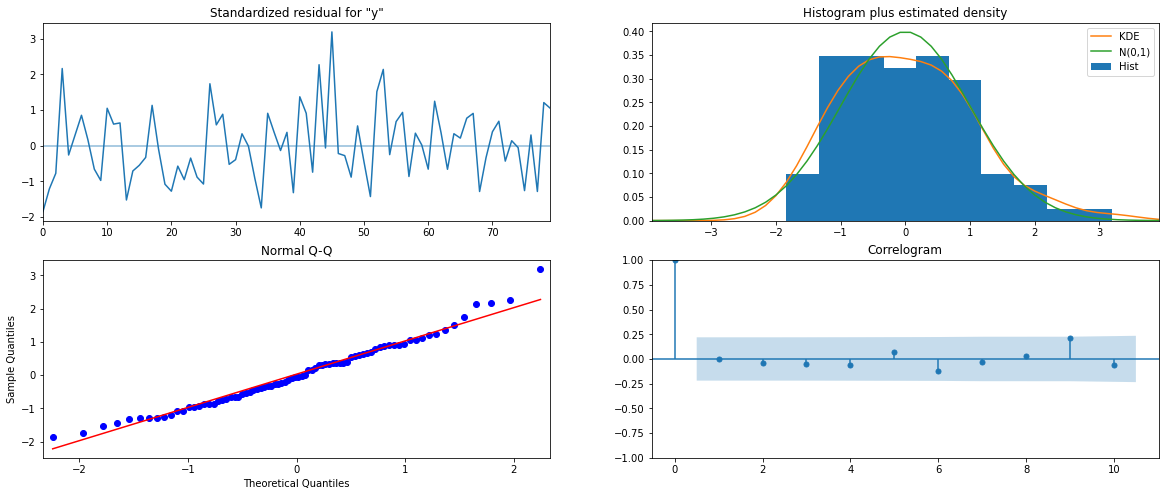

In [146]:
results_auto_SARIMA_24.plot_diagnostics()
plt.show()

In [147]:
predicted_auto_SARIMA_24 = results_auto_SARIMA_24.get_forecast(steps=len(test))

In [148]:
predicted_auto_SARIMA_24.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  57.520844  14.796368      28.520496      86.521191
1  66.249862  14.848682      37.146980      95.352743
2  80.700900  14.851704      51.592096     109.809704
3  68.599810  14.854724      39.485085      97.714535
4  75.317291  14.857745      46.196646     104.437935

In [149]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_24.predicted_mean,squared=False)
print(rmse)

19.955596726995324


In [150]:
final_avg =test.copy()
pred_SARIMA24 = results_auto_SARIMA_24.get_forecast(steps=len(test))
pred_SARIMA24.predicted_mean

array([ 57.52084353,  66.24986181,  80.70089976,  68.59981038,
        75.31729063,  71.82546326,  74.96414821,  76.79898925,
        76.71222941,  77.50142015,  91.91152305, 112.44659224,
        54.46383073,  66.74974906,  64.11744349,  63.91427521,
        69.19446361,  68.90428127,  73.02355985,  80.18943384,
        73.62701385,  73.67764084,  88.65772383, 107.1355908 ,
        53.02529662,  62.50855529,  74.37948808,  63.97839999,
        70.33987925,  65.98815737,  69.25174978,  71.6005074 ,
        70.87775452,  71.60848322,  83.81525128, 101.63651697,
        52.45247453,  62.63999155,  59.7931631 ,  59.35987809,
        64.75737038,  64.14419467,  67.85997833,  75.01082499,
        68.22166091,  69.3475549 ,  80.73219899,  96.87504267,
        50.30597484,  58.63857321,  69.01791369,  59.92373073,
        65.48588498,  61.68096048,  64.53447986])

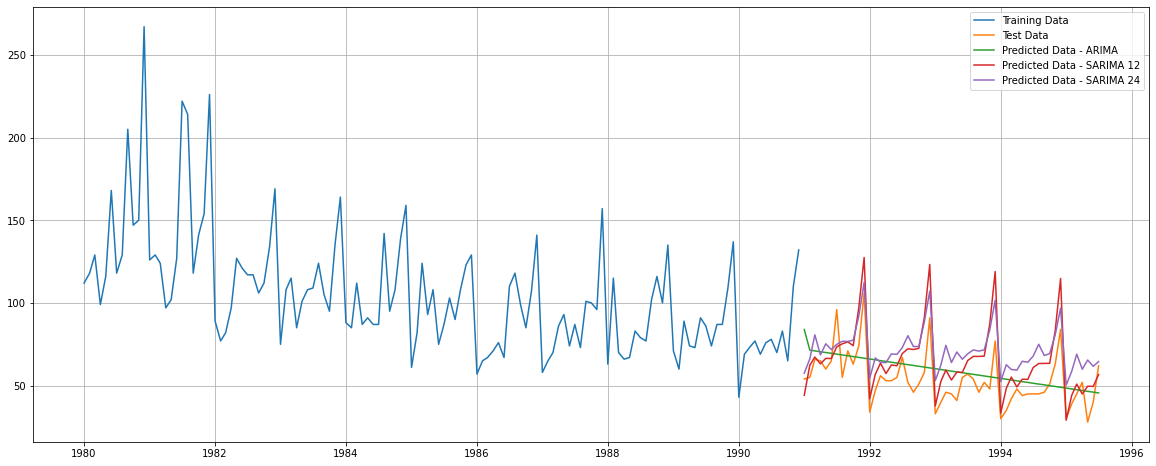

In [177]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA 12')
plt.plot(test.index,pred_SARIMA24.predicted_mean,label='Predicted Data - SARIMA 24')
plt.legend(loc='best')
plt.grid();

In [152]:
resultsSARIMA = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA 24(0,1,2)(1,0,2,24)'])


resultsDf = pd.concat([resultsDf,resultsSARIMA])

resultsDf

Test RMSE
RegressionOnTime                                     15.275732
NaiveModel                                           79.738550
SimpleAverageModel                                   53.480857
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
DoubleExponentialSmoothing                           15.275724
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
ARIMA(0,1,2)                                         15.624986
SARIMA12(0,1,2)(2,1,2,12)                            16.519184
SARIMA 24(0,1,2)(1,0,2,24)                           19.955597

### Manual Arima Based in the ACF and PACF

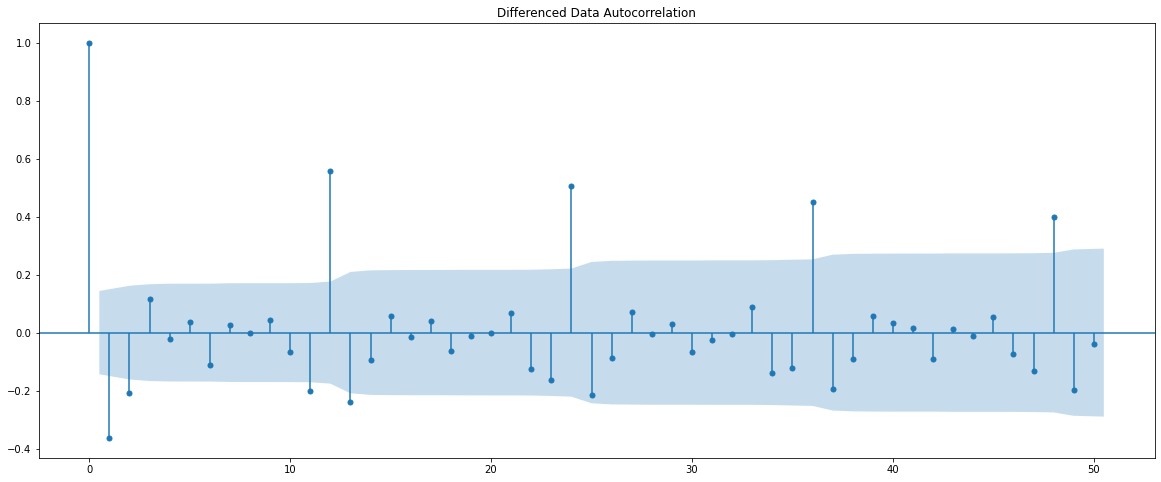

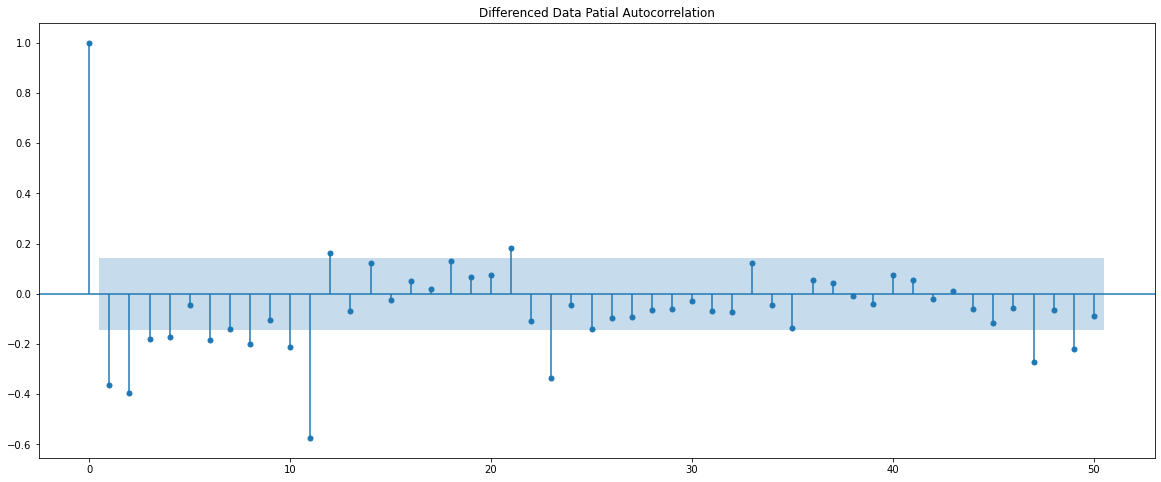

In [178]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [153]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(3,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -633.485
Method:                       css-mle   S.D. of innovations             29.950
Date:                Mon, 25 Jan 2021   AIC                           1280.969
Time:                        13:03:30   BIC                           1301.096
Sample:                    02-01-1980   HQIC                          1289.148
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4883      0.085     -5.723      0.000      -0.656      -0.321
ar.L1.D.Rose    -0.3558      0.332     -1.071      0.284      -1.007       0.295
ar.L2.D.Rose     0.0279      0.120      0.23

In [154]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [155]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.529331857024468


In [156]:
results_ARIMA_MAN = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA MANUAL(3,1,2)'])


resultsDf = pd.concat([resultsDf,results_ARIMA_MAN])

resultsDf

Test RMSE
RegressionOnTime                                     15.275732
NaiveModel                                           79.738550
SimpleAverageModel                                   53.480857
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
DoubleExponentialSmoothing                           15.275724
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
ARIMA(0,1,2)                                         15.624986
SARIMA12(0,1,2)(2,1,2,12)                            16.519184
SARIMA 24(0,1,2)(1,0,2,24)                           19.955597
ARIMA MANUAL(3,1,2)                                  15.529332

In [157]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
DoubleExponentialSmoothing                           15.275724
RegressionOnTime                                     15.275732
ARIMA MANUAL(3,1,2)                                  15.529332
ARIMA(0,1,2)                                         15.624986
SARIMA12(0,1,2)(2,1,2,12)                            16.519184
SARIMA 24(0,1,2)(1,0,2,24)                           19.955597
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
SimpleAverageModel                                   53.480857
NaiveModel                                           79.738550
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922

### MANUAL SARIMA WITH SEASON AS 12 since this has given lowest AIC compared to 24 months

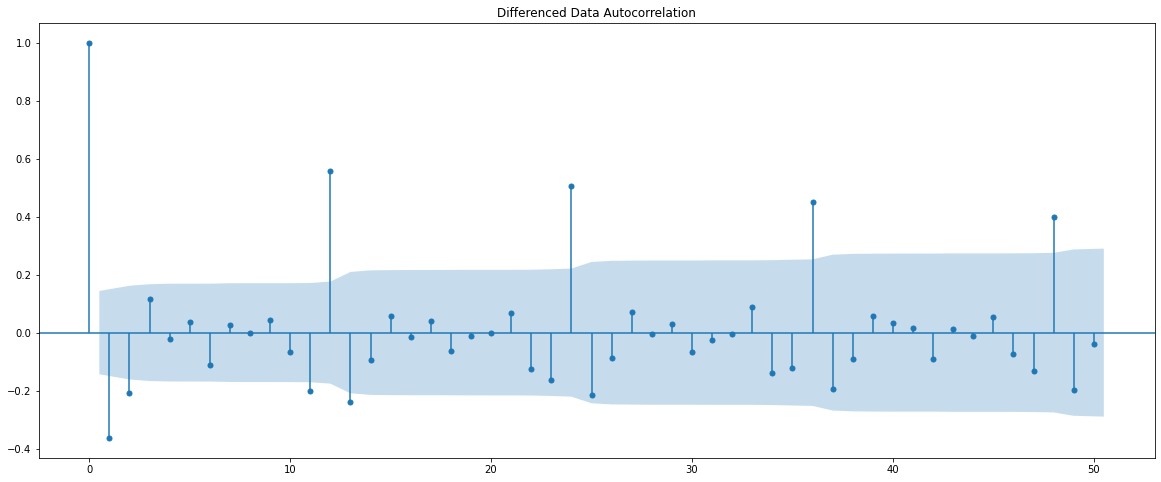

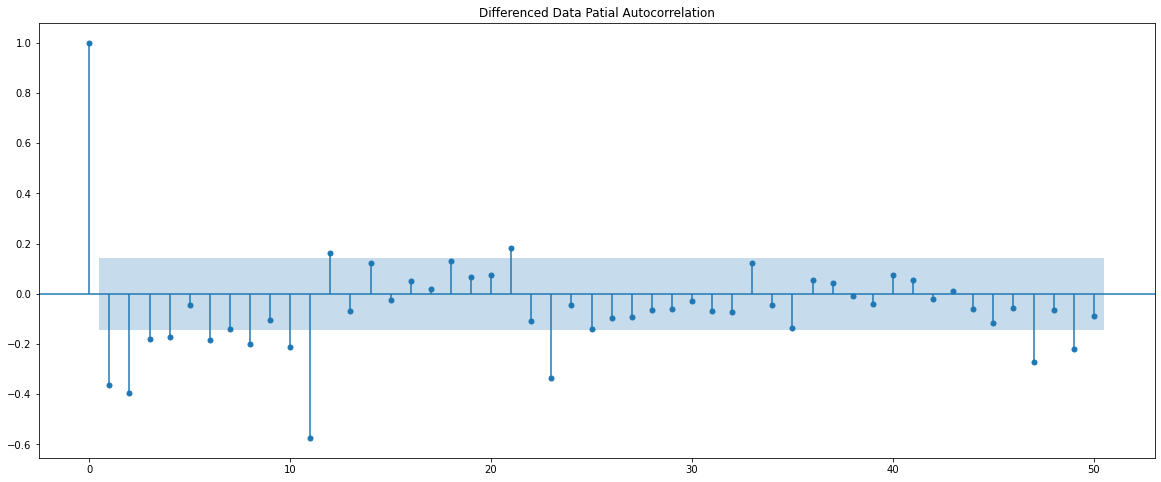

In [158]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

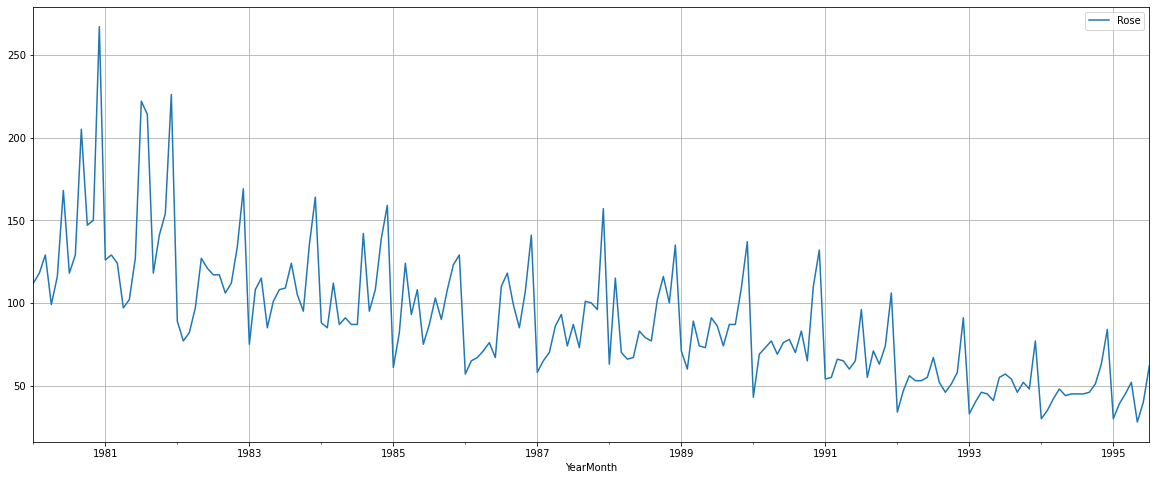

In [159]:
df.plot()
plt.grid();

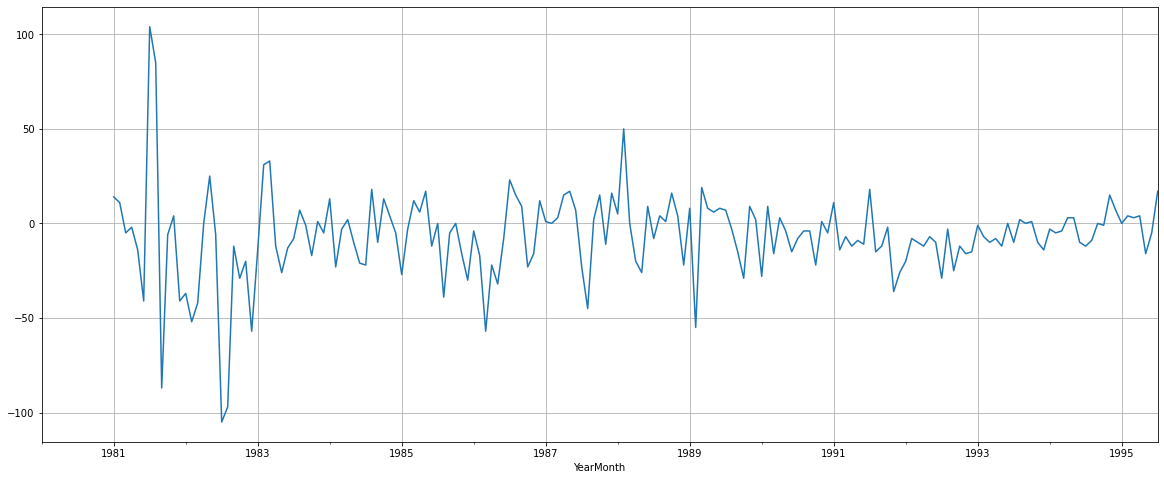

In [160]:
(df['Rose'].diff(12)).plot()
plt.grid();

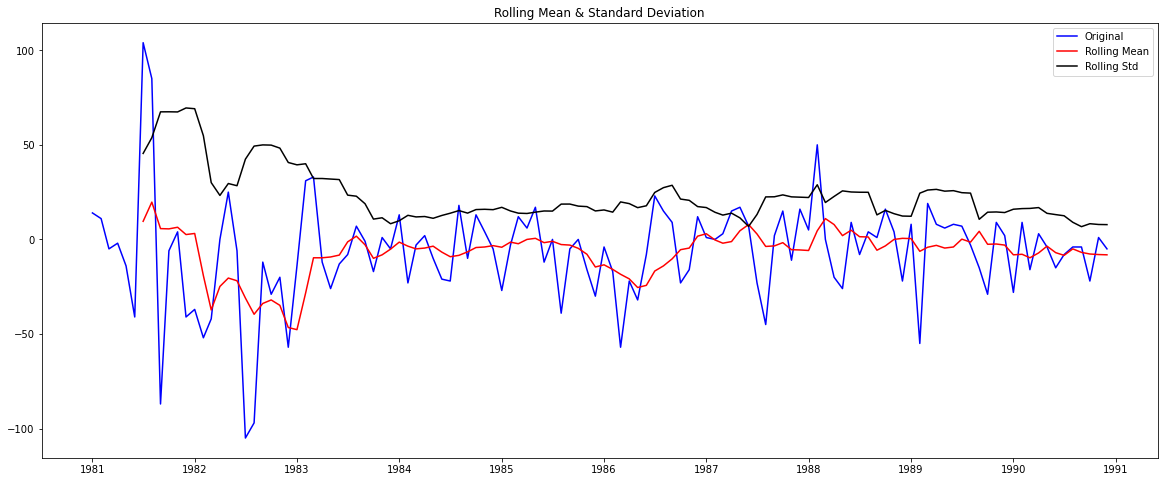

Results of Dickey-Fuller Test:
Test Statistic                  -3.619482
p-value                          0.005399
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [161]:
test_stationarity((train['Rose'].diff(12).dropna())) 

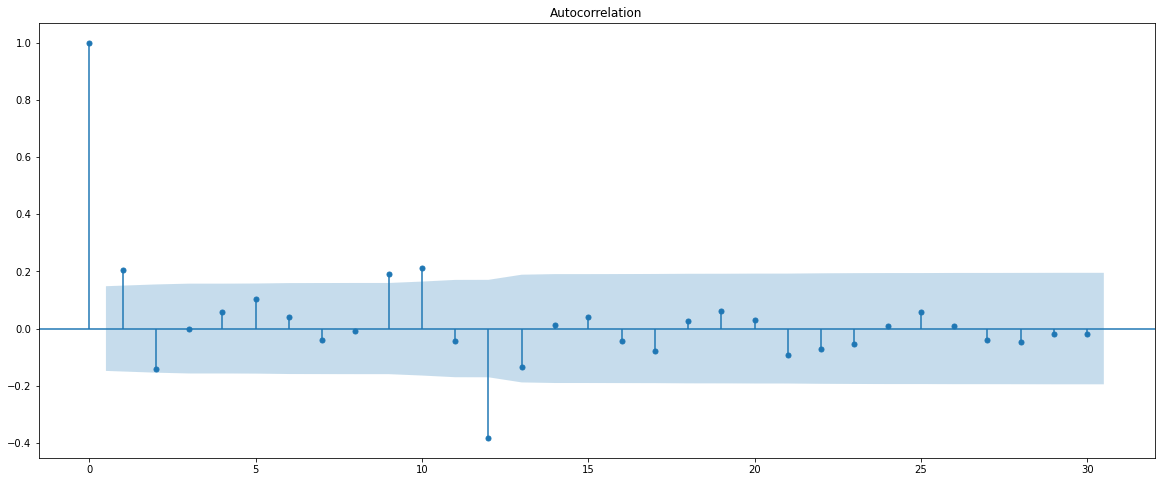

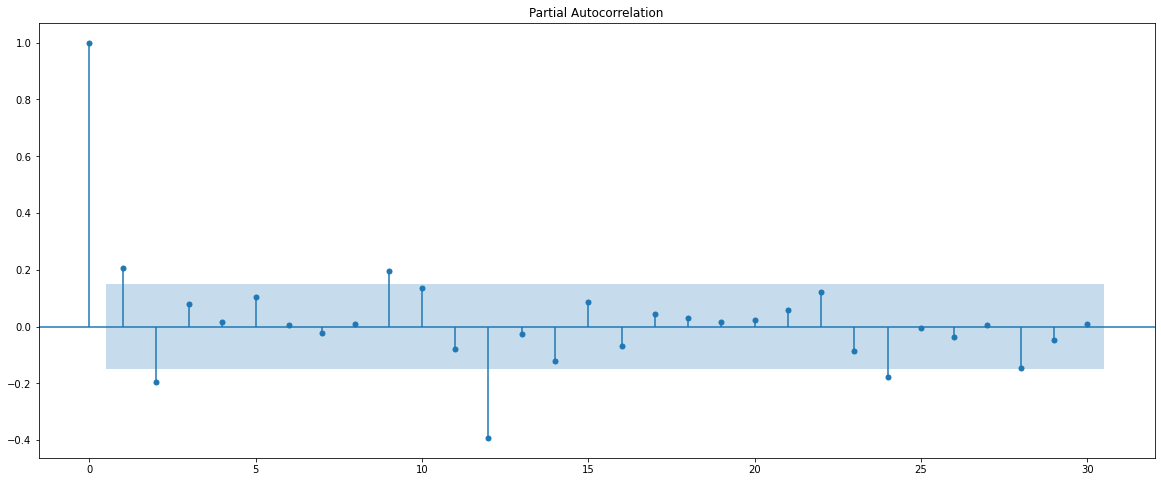

In [162]:
plot_acf((df['Rose'].diff(12).dropna()),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()),lags=30);

We can see that the P is now 2 and Q is 1

In [163]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -396.558
Date:                              Mon, 25 Jan 2021   AIC                            805.116
Time:                                      13:03:33   BIC                            820.439
Sample:                                           0   HQIC                           811.308
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9609      0.163     -5.882      0.000      -1.281      -0.641
ma.L2         -0.08

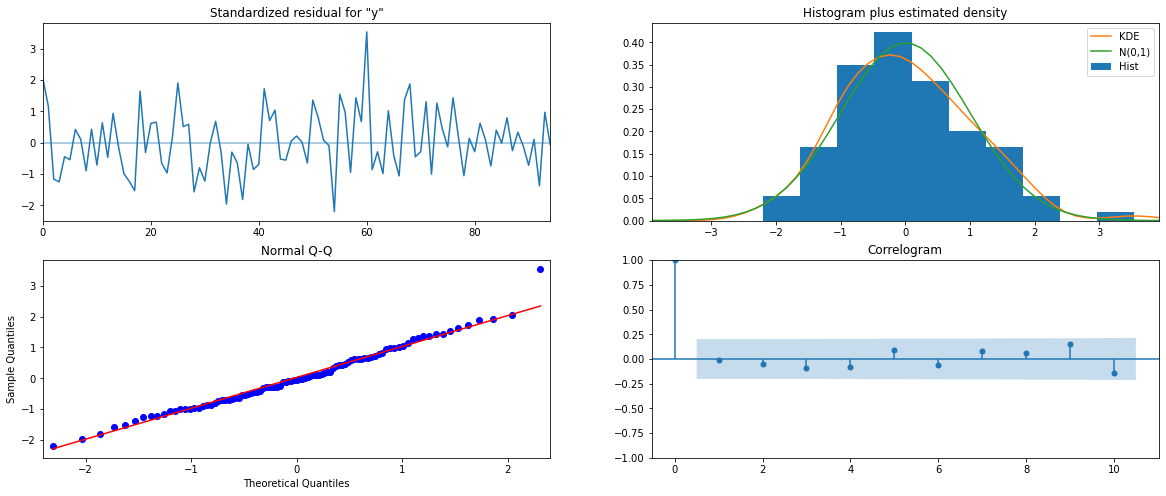

In [164]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [165]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [166]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  46.040990  14.824839      16.984840      75.097140
1  63.588026  14.935848      34.314301      92.861751
2  67.367487  14.949755      38.066506      96.668468
3  63.269368  14.963674      33.941105      92.597631
4  65.765023  14.977585      36.409497      95.120550

In [167]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

16.750292383775435


In [168]:
Manual_Sarima_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(0,1,2)(2,1,1,12)'])


resultsDf = pd.concat([resultsDf,Manual_Sarima_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     15.275732
NaiveModel                                           79.738550
SimpleAverageModel                                   53.480857
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
DoubleExponentialSmoothing                           15.275724
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
ARIMA(0,1,2)                                         15.624986
SARIMA12(0,1,2)(2,1,2,12)                            16.519184
SARIMA 24(0,1,2)(1,0,2,24)                           19.955597
ARIMA MANUAL(3,1,2)                                  15.529332
Manual SARIMA(0,1,2)(2,1,1,12)                       16.750292

In [169]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.951007
2pointTrailingMovingAverage                          11.529409
4pointTrailingMovingAverage                          14.455221
6pointTrailingMovingAverage                          14.572009
9pointTrailingMovingAverage                          14.731209
DoubleExponentialSmoothing                           15.275724
RegressionOnTime                                     15.275732
ARIMA MANUAL(3,1,2)                                  15.529332
ARIMA(0,1,2)                                         15.624986
SARIMA12(0,1,2)(2,1,2,12)                            16.519184
Manual SARIMA(0,1,2)(2,1,1,12)                       16.750292
SARIMA 24(0,1,2)(1,0,2,24)                           19.955597
Alpha=0.063,Beta=0.054,Gamma=1.496,Triple Expon...   21.276162
Alpha=0.987,SimpleExponentialSmoothing               36.816904
Alpha=0.2,SimpleExponentialSmoothing                 41.382452
SimpleAverageModel                                   53.480857
NaiveModel                                           79.738550
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.591922

## Final Model

In [179]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.04,
                                                                 smoothing_seasonal=0.3)

In [180]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 18.566190986268243


In [182]:
prediction_1 = fullmodel1.forecast(steps=17) 

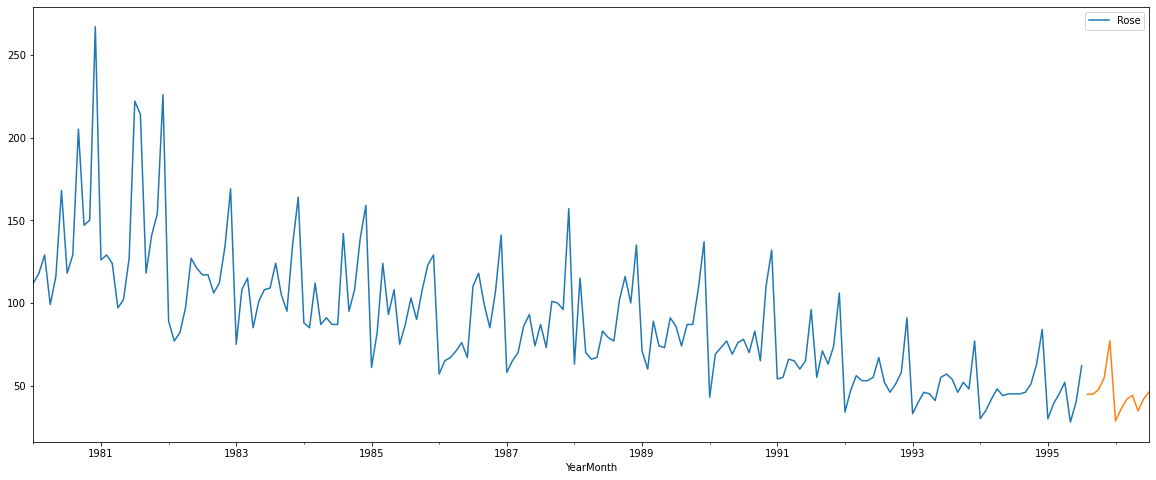

In [183]:
df.plot()
prediction_1.plot();

In [184]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01   8.301818   44.786513   81.271208
1995-09-01   8.374537   44.859233   81.343928
1995-10-01  11.125362   47.610057   84.094752
1995-11-01  18.289624   54.774320   91.259015
1995-12-01  40.616415   77.101111  113.585806

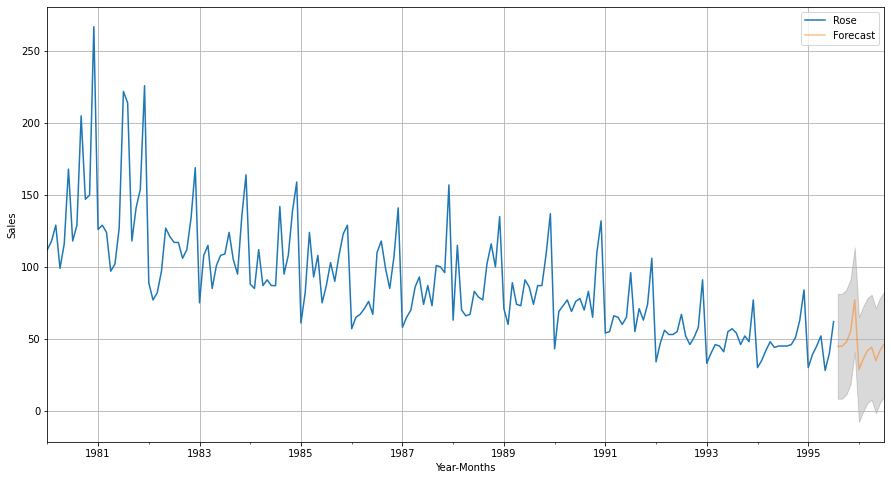

In [185]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [186]:
df.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [187]:
pred_1_df.tail()

lower_CI  prediction   upper_ci
1996-03-01  5.253468   41.738163  78.222858
1996-04-01  7.691186   44.175881  80.660576
1996-05-01 -1.708040   34.776655  71.261350
1996-06-01  5.537773   42.022468  78.507163
1996-07-01  9.878247   46.362942  82.847638

In [194]:
prediction_1

1995-08-01    44.786513
1995-09-01    44.859233
1995-10-01    47.610057
1995-11-01    54.774320
1995-12-01    77.101111
1996-01-01    28.630294
1996-02-01    35.903477
1996-03-01    41.738163
1996-04-01    44.175881
1996-05-01    34.776655
1996-06-01    42.022468
1996-07-01    46.362942
Freq: MS, dtype: float64